# Data Exploration (initial)

1. Set-up
2. Import and quick look at our data
3. Exploration of target variables (diseases to predict)
  - Barchart representation of our target variables (to demonstrate major class imbalance)
4. Exploration of relationships in the categorical data
  - Mosaicplots for relevant attribute/target variable relationship
5. Exploration of relationships in the numerical data
  - Boxplots

## NOTE: If run with full dataset this notebook takes about a minute to run

## Functions and Packages

In [1]:
### Functions taken from Lab 3 ###

NreadDataset<-function(csvFilename){
  dataset<-read.csv(csvFilename,encoding="UTF-8",stringsAsFactors = FALSE)
  # The field names "confuse" some of the library algorithms
  # As they do not like spaces, punctuation, etc.
  names(dataset)<-NPREPROCESSING_removePunctuation(names(dataset))

  print(paste("CSV dataset",csvFilename,"has been read. Records=",nrow(dataset)))
  return(dataset)
}

NPREPROCESSING_removePunctuation<-function(fieldName){
  return(gsub("[[:punct:][:blank:]]+", "", fieldName))
}

NPREPROCESSING_initialFieldType<-function(dataset){

  field_types<-vector()
  for(field in 1:(ncol(dataset))){

    entry<-which(manualTypes$name==names(dataset)[field])
    if (length(entry)>0){
      field_types[field]<-manualTypes$type[entry]
      next
    }

    if (is.numeric(dataset[,field])) {
      field_types[field]<-TYPE_NUMERIC
    }
    else {
      field_types[field]<-TYPE_SYMBOLIC
    }
  }
  return(field_types)
  }

NPREPROCESSING_discreteNumeric<-function(dataset,field_types,cutoff){

  #For every field in our dataset
  for(field in 1:(ncol(dataset))){

    #Only for fields that are all numeric
    if (field_types[field]==TYPE_NUMERIC) {

      #191020NRT use R hist() function to create 10 bins
      histogramAnalysis<-hist(dataset[,field], breaks = 10, plot=FALSE)
      bins<-histogramAnalysis$counts/length(dataset[,field])*100  # Convert to %

      graphTitle<-"AUTO:"

      #If the number of bins with less than 1% of the values is greater than the cutoff
      #then the field is deterimed to be a discrete value

      if (length(which(bins<1.0))>cutoff)
        field_types[field]<-TYPE_DISCRETE
      else
        field_types[field]<-TYPE_ORDINAL

      #Type of field is the chart name
      hist(dataset[,field], breaks = 10, plot=TRUE,
           main=paste(graphTitle,field_types[field]),
           xlab=names(dataset[field]),ylab="Number of Records",
           yaxs="i",xaxs="i",border = NA)

    } #endif numeric types
  } #endof for
  return(field_types)
}


In [2]:
### Needed libraries so far ###
library(ggplot2)
library(patchwork)
library(corrplot)
library(reshape2)

# IF INSTALLATION NEEDED
#install.packages("patchwork")
#install.packages("ggplot2")
#install.packages("corrplot")
#install.packages("reshape2")

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
corrplot 0.92 loaded

Warning message:
"package 'reshape2' was built under R version 4.0.5"


## Import and quick look at our data

Checking size and features of our full dataset

In [3]:
ourdata<-NreadDataset("brfssCleaned.csv")

[1] "CSV dataset brfssCleaned.csv has been read. Records= 401958"


In [4]:
dim(ourdata)

[1] 401958     62

In [5]:
names(ourdata)

[1] "SEXVAR"   "GENHLTH"  "PHYSHLTH" "MENTHLTH" "HLTHPLN1" "PERSDOC2"
 [7] "MEDCOST"  "CHECKUP1" "EXERANY2" "SLEPTIM1" "CVDINFR4" "CVDCRHD4"
[13] "CVDSTRK3" "ASTHMA3"  "CHCSCNCR" "CHCOCNCR" "CHCCOPD2" "HAVARTH4"
[19] "ADDEPEV3" "CHCKDNY2" "DIABETE4" "LASTDEN4" "RMVTETH4" "MARITAL" 
[25] "EDUCA"    "RENTHOM1" "CPDEMO1B" "VETERAN3" "EMPLOY1"  "CHILDREN"
[31] "INCOME2"  "WEIGHT2"  "DEAF"     "BLIND"    "DECIDE"   "DIFFWALK"
[37] "DIFFDRES" "DIFFALON" "SMOKE100" "USENOW3"  "ALCDAY5"  "FLUSHOT7"
[43] "PNEUVAC4" "FALL12MN" "SEATBELT" "COLNSCPY" "SIGMSCPY" "BLDSTOL1"
[49] "STOOLDNA" "VIRCOLON" "HIVTST7"  "HIVRISK5" "ECIGARET" "QSTVER"  
[55] "QSTLANG"  "METSTAT"  "URBSTAT"  "PRACE1"   "AGEG5YR"  "HTM4"    
[61] "BMI5"     "DROCDY3"

In [6]:
head(ourdata)

,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,⋯,ECIGARET,QSTVER,QSTLANG,METSTAT,URBSTAT,PRACE1,AGEG5YR,HTM4,BMI5,DROCDY3
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,⋯,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.25,0.1000000,1,1,1,0,1.00,0,0.1739130,⋯,0,0,0,0,0,0.0000000,0.5833333,0.5266667,0.05300312,0
2,1,0.50,0.0000000,0,0,0,0,0.25,0,0.2608696,⋯,1,0,0,0,0,0.1428571,0.7500000,0.4800000,0.19858813,0
3,1,0.50,0.0000000,0,0,0,1,0.25,0,0.2608696,⋯,1,0,0,0,0,0.1428571,0.7500000,0.5466667,0.18847718,0
4,1,0.00,0.0000000,0,0,1,1,0.50,1,0.2173913,⋯,1,0,0,0,0,0.0000000,1.0000000,0.5133333,0.18847718,0
5,1,0.25,0.0000000,0,0,0,1,0.25,0,0.2608696,⋯,1,0,0,0,0,0.0000000,1.0000000,0.5133333,0.09628515,0
6,0,0.75,0.6666667,1,0,0,1,0.50,0,0.3043478,⋯,0,0,0,1,0,0.0000000,0.7500000,0.5600000,0.16849902,0


## Exploration of target variables (diseases to predict)

A subset of the dataset is created, containing only the target variables

In [7]:
disease_col_names <- c('ASTHMA3', 'CHCSCNCR', 'CHCCOPD2', 'CHCKDNY2', 'CVDCRHD4', 'CHCOCNCR', 'HAVARTH4', 'DIABETE4')

In [8]:
subset <- ourdata[, disease_col_names]
head(subset)

,ASTHMA3,CHCSCNCR,CHCCOPD2,CHCKDNY2,CVDCRHD4,CHCOCNCR,HAVARTH4,DIABETE4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,0,0,1,1,1
2,1,0,0,0,0,0,1,0
3,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0
6,1,0,1,0,0,0,1,1


In [9]:
length(which(subset$CHCCOPD2==1))
length(which(subset$CHCCOPD2==0))

[1] 31443

[1] 370515

### Visualisation of class imbalance

We are dealing with rare diseases so the class of 'does not have disease' is heavily favoured

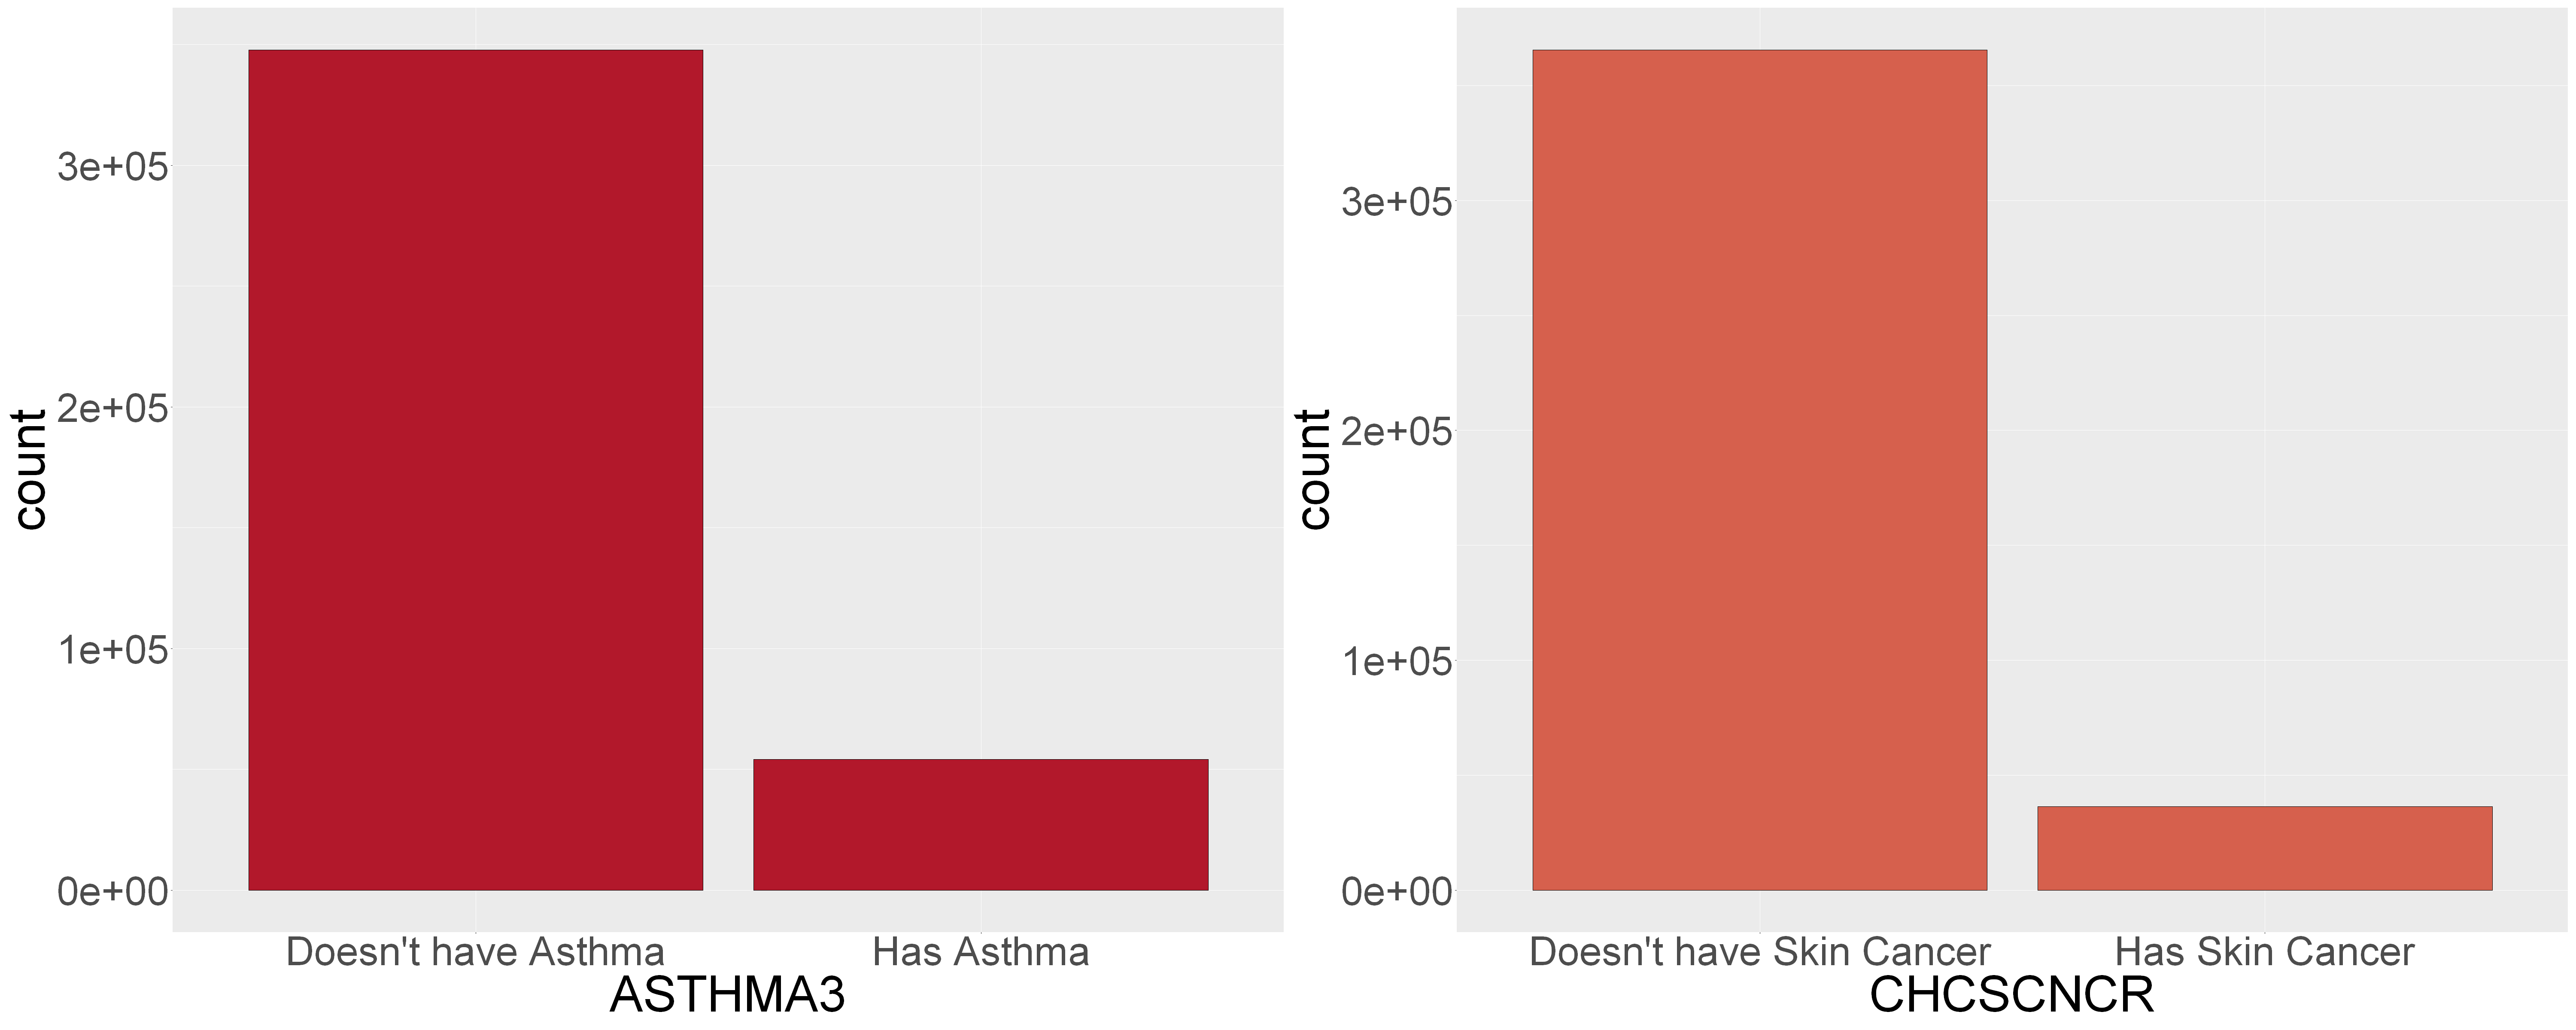

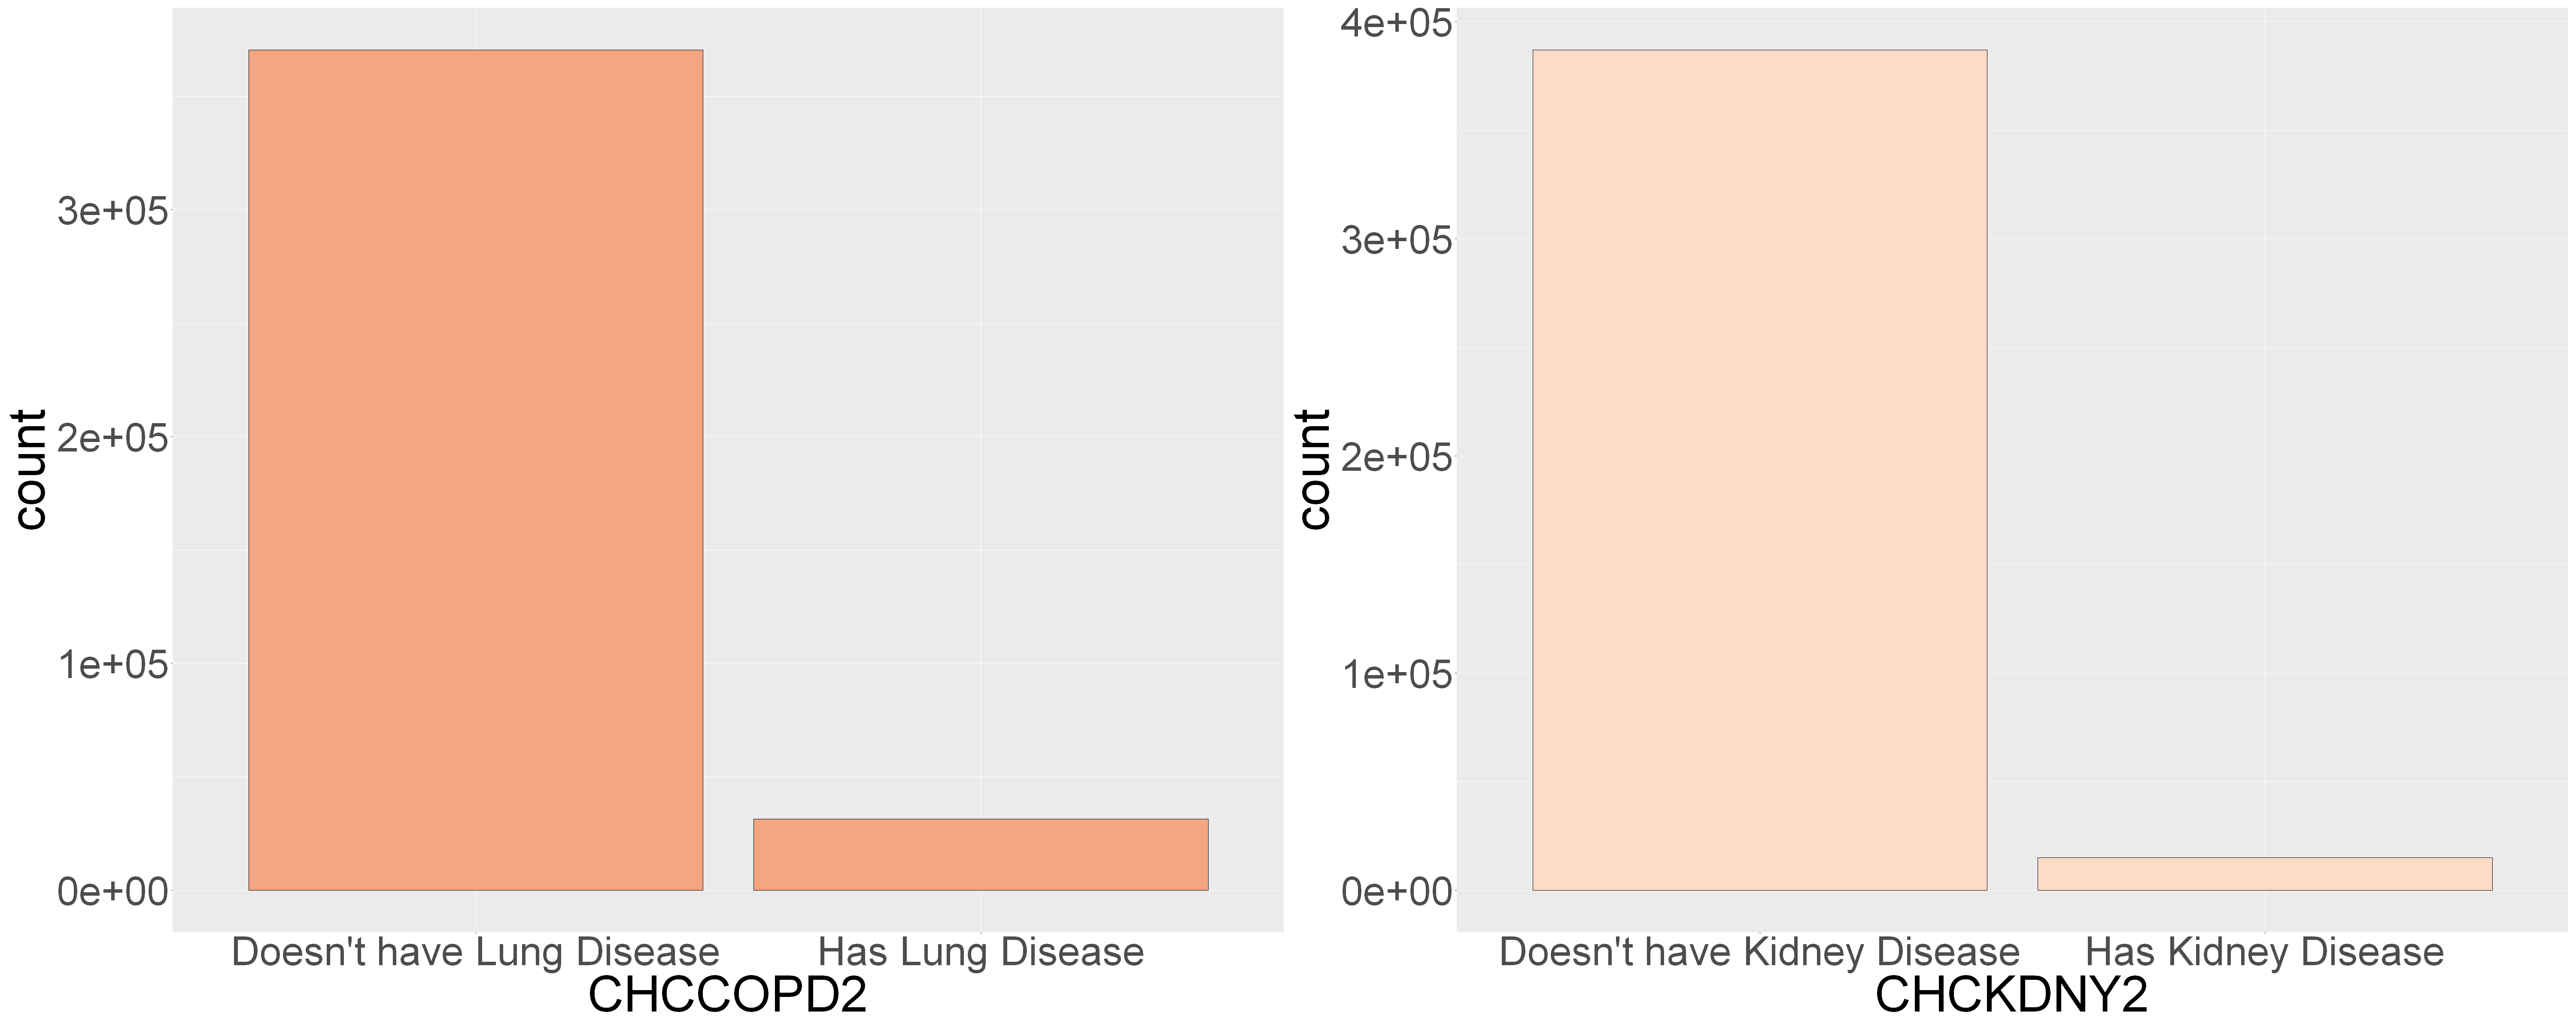

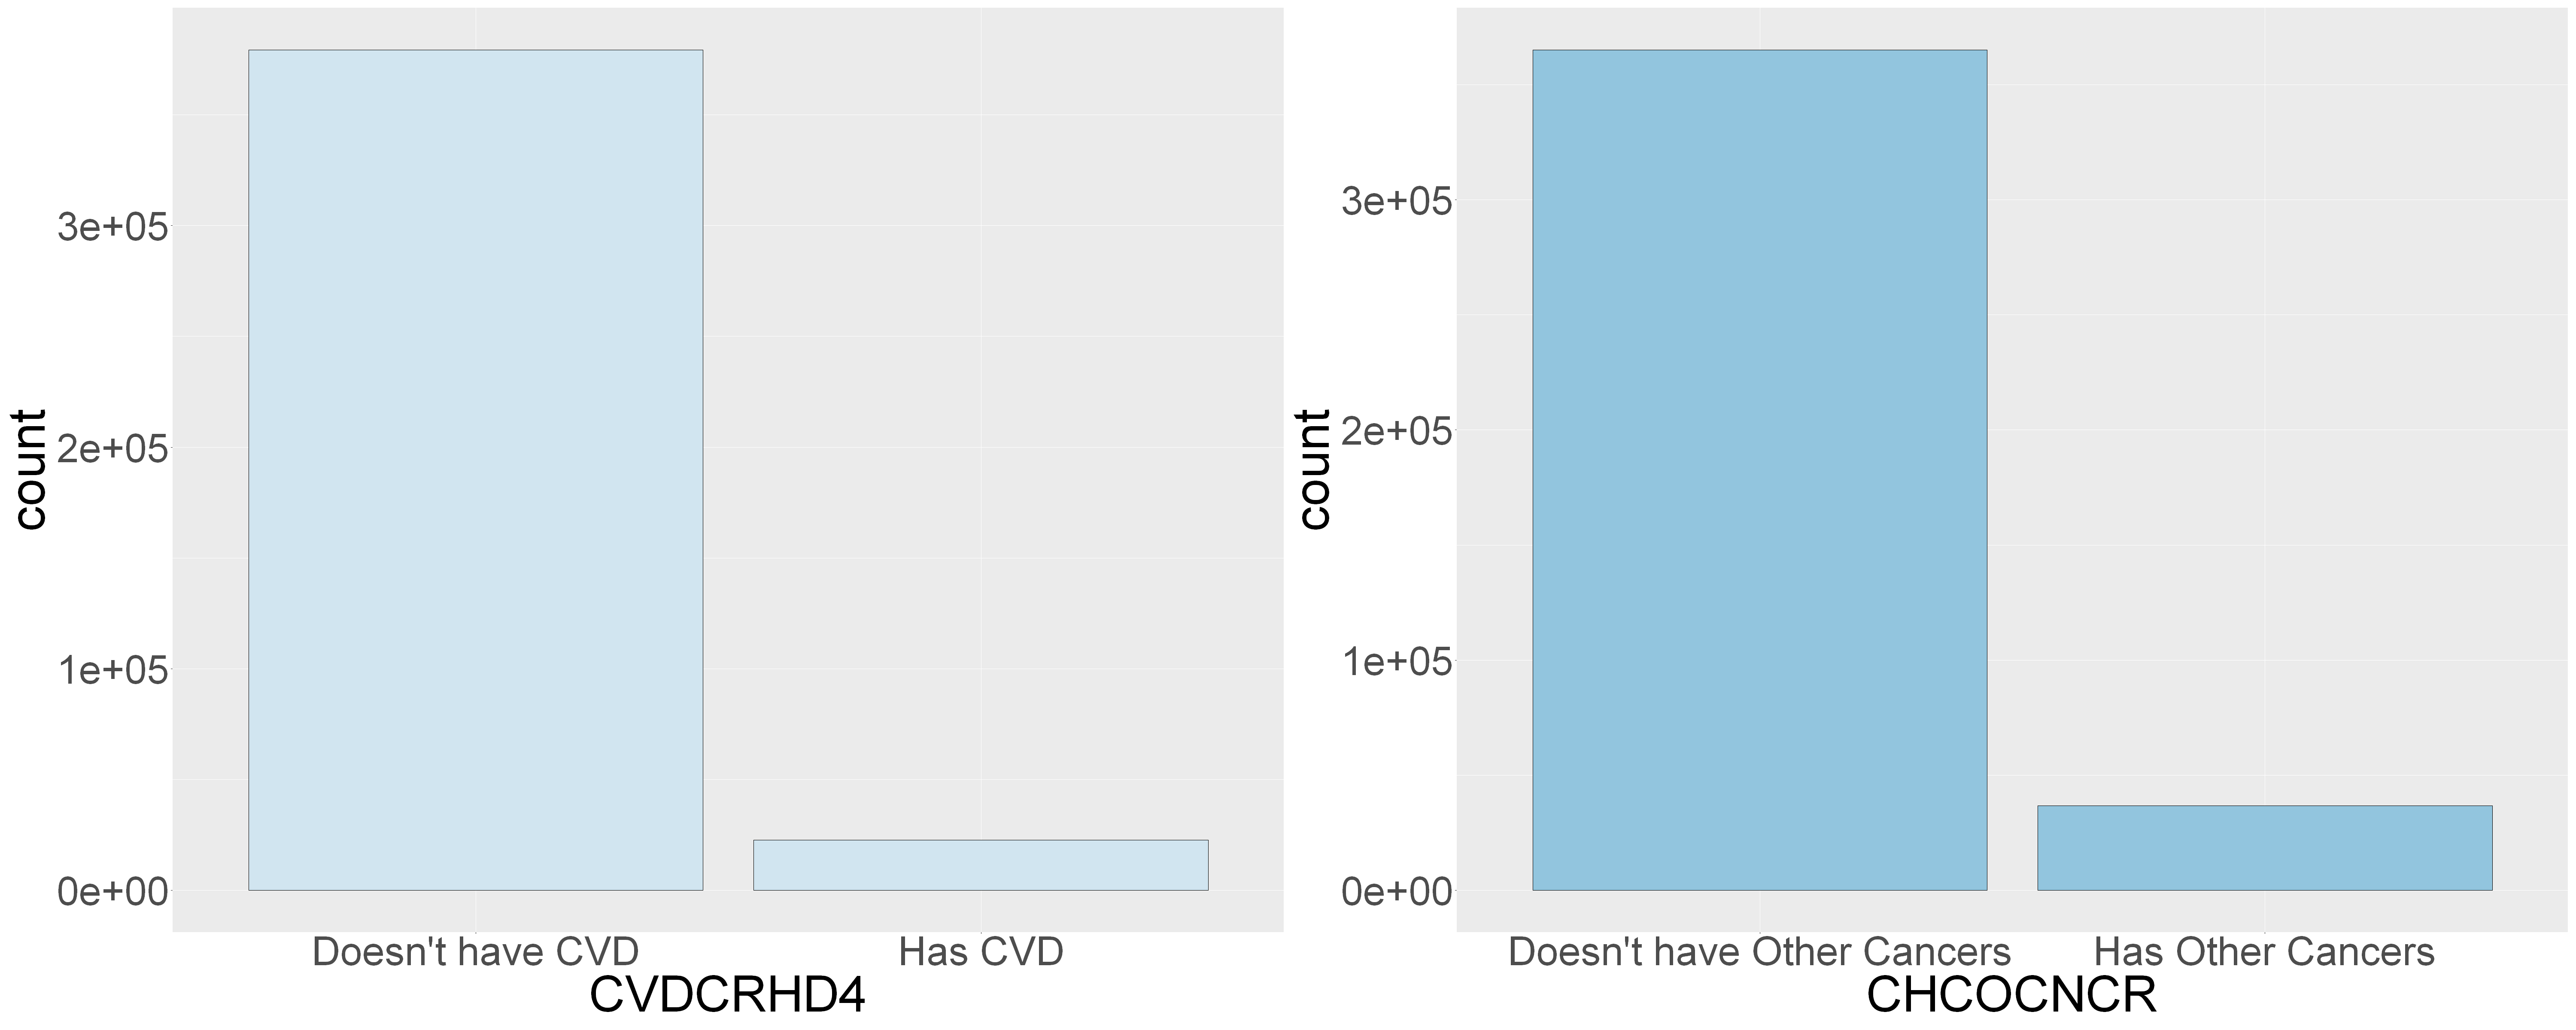

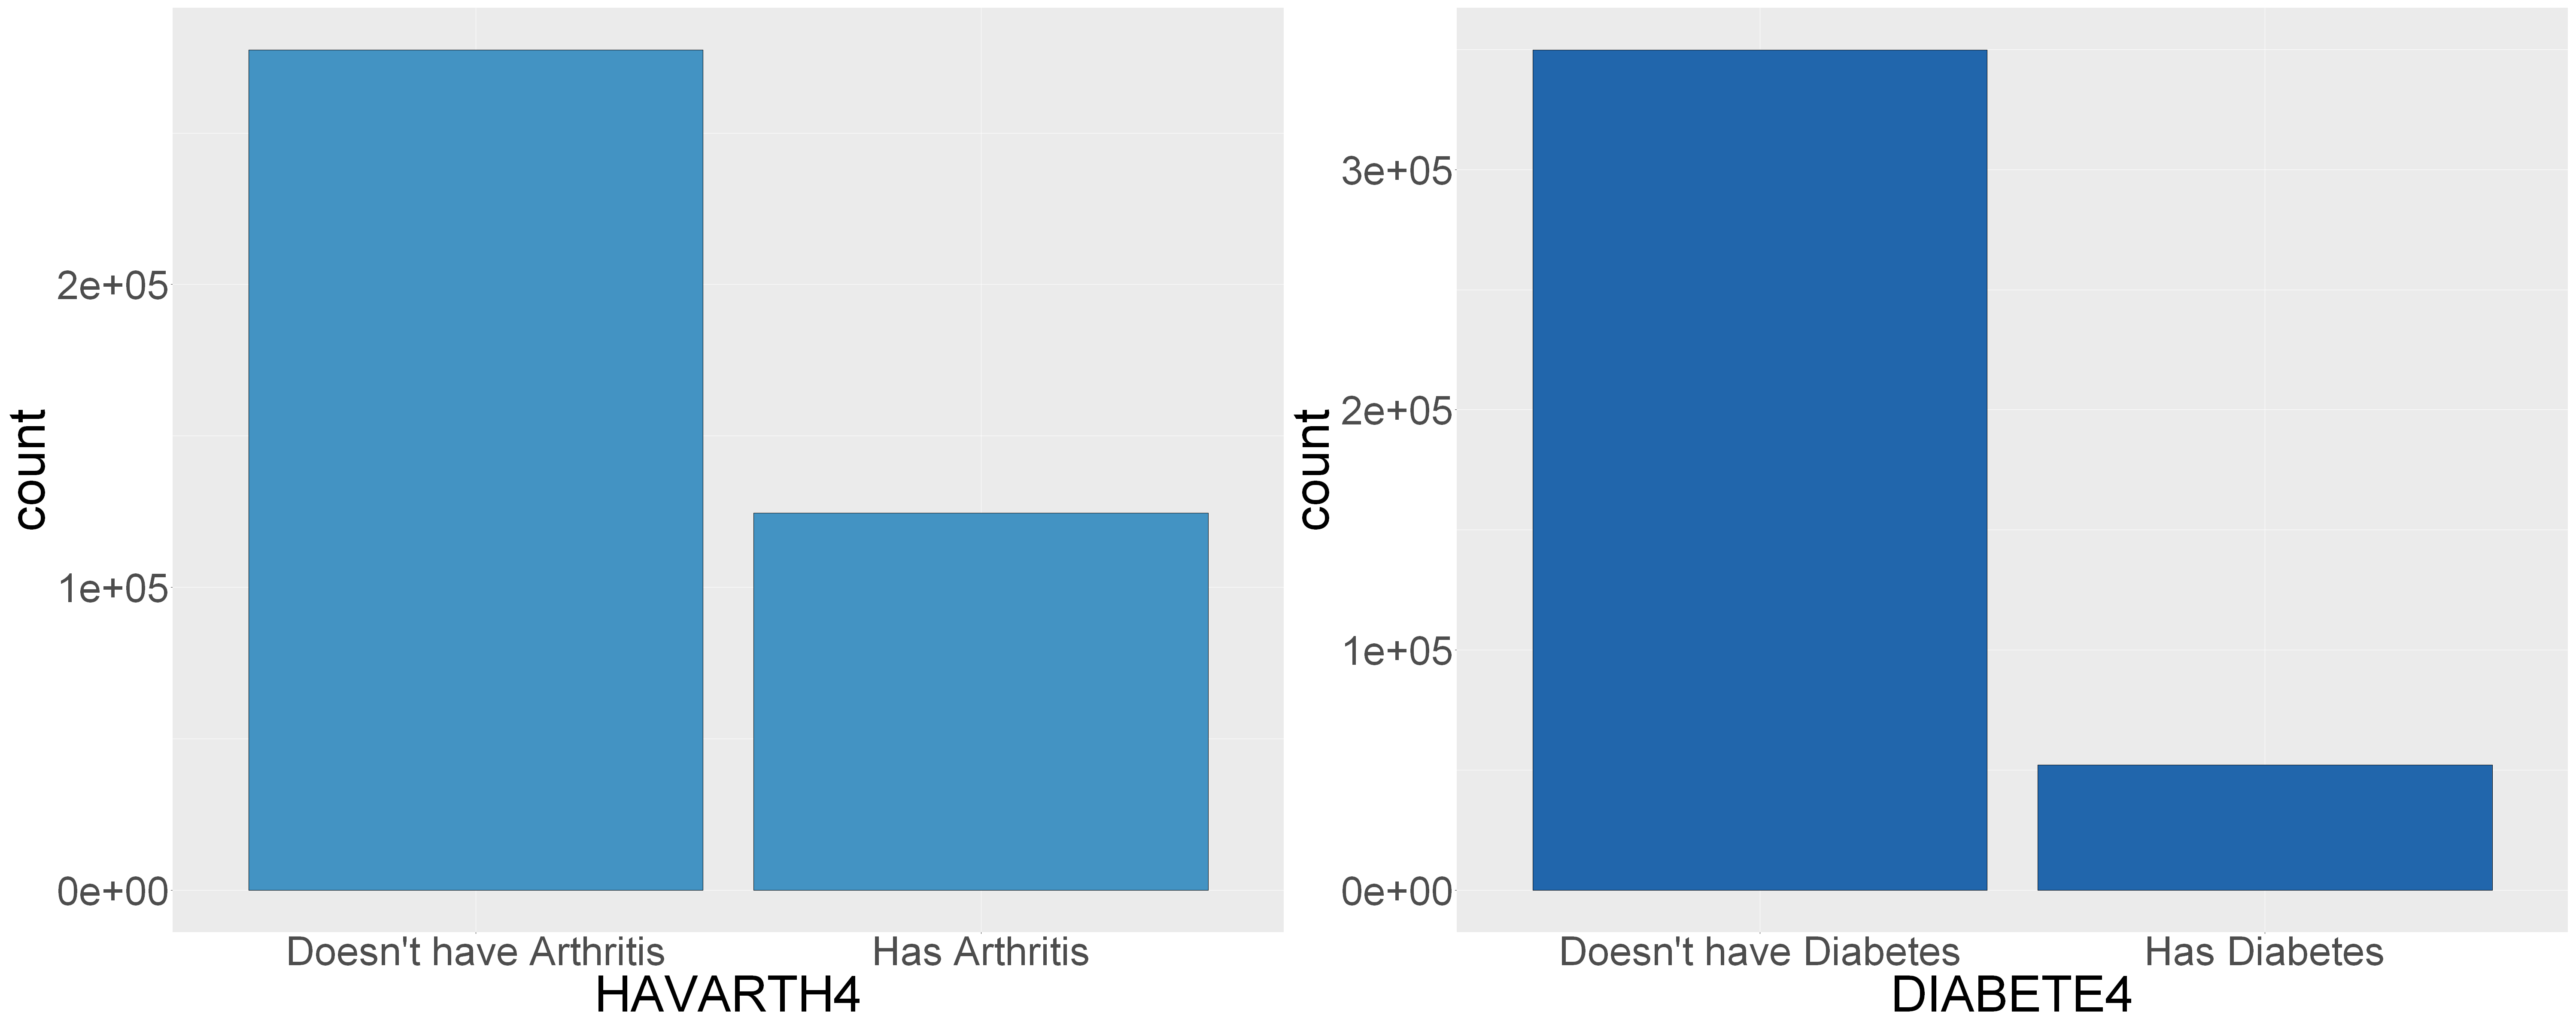

In [10]:
### Converting 0s and 1s into 'doesn't have disease' and 'has disease'###
subset$ASTHMA3 <- factor(subset$ASTHMA3, labels=c("Doesn't have Asthma", "Has Asthma"))
subset$CHCSCNCR <- factor(subset$CHCSCNCR, labels=c("Doesn't have Skin Cancer", "Has Skin Cancer"))
subset$CHCCOPD2 <- factor(subset$CHCCOPD2, labels=c("Doesn't have Lung Disease", "Has Lung Disease"))
subset$CHCKDNY2 <- factor(subset$CHCKDNY2, labels=c("Doesn't have Kidney Disease", "Has Kidney Disease"))
subset$CVDCRHD4 <- factor(subset$CVDCRHD4, labels=c("Doesn't have CVD", "Has CVD"))
subset$CHCOCNCR <- factor(subset$CHCOCNCR, labels=c("Doesn't have Other Cancers", "Has Other Cancers"))
subset$HAVARTH4 <- factor(subset$HAVARTH4, labels=c("Doesn't have Arthritis", "Has Arthritis"))
subset$DIABETE4 <- factor(subset$DIABETE4, labels=c("Doesn't have Diabetes", "Has Diabetes"))

# Resize plot display area (big graphs incoming!)
options(repr.plot.width=50, repr.plot.height=20, repr.plot.pointsize=70)

### Creating barcharts for each disease ###
asthma <- ggplot(subset, aes(x=ASTHMA3)) + geom_bar(color="black", fill="#B2182B") + theme(text = element_text(size = 70))
skin_cancer <- ggplot(subset, aes(x=CHCSCNCR)) + geom_bar(color="black", fill="#D6604D") + theme(text = element_text(size = 70))
pulmonary_disease <- ggplot(subset, aes(x=CHCCOPD2)) + geom_bar(color="black", fill="#F4A582") + theme(text = element_text(size = 70))
kidney_disease <- ggplot(subset, aes(x=CHCKDNY2)) + geom_bar(color="black", fill="#FDDBC7") + theme(text = element_text(size = 70))
coronary_heart_disease <- ggplot(subset, aes(x=CVDCRHD4)) + geom_bar(color="black", fill="#D1E5F0") + theme(text = element_text(size = 70))
other_cancers <- ggplot(subset, aes(x=CHCOCNCR)) + geom_bar(color="black", fill="#92C5DE") + theme(text = element_text(size = 70))
arthritis <- ggplot(subset, aes(x=HAVARTH4)) + geom_bar(color="black", fill="#4393C3") + theme(text = element_text(size = 70))
diabetes <- ggplot(subset, aes(x=DIABETE4)) + geom_bar(color="black", fill="#2166AC") + theme(text = element_text(size = 70))

asthma + skin_cancer
pulmonary_disease + kidney_disease 
coronary_heart_disease + other_cancers
arthritis + diabetes

## Visualising relationships in the BRFSS data

### Categorical Features

To identify trends in our data, we plot various fields against our target diseases

#### Set-up

In [11]:
### Fixing data labels for better visualisation ###

### Converting 0s and 1s into 'doesn't have disease' and 'has disease'###
ourdata$ASTHMA3 <- factor(ourdata$ASTHMA3, labels=c("Doesn't have Asthma", "Has Asthma"))
ourdata$CHCSCNCR <- factor(ourdata$CHCSCNCR, labels=c("Doesn't have Skin Cancer", "Has Skin Cancer"))
ourdata$CHCCOPD2 <- factor(ourdata$CHCCOPD2, labels=c("Doesn't have Pulmonary Disease", "Has Pulmonary Disease"))
ourdata$CHCKDNY2 <- factor(ourdata$CHCKDNY2, labels=c("Doesn't have Kidney Disease", "Has Kidney Disease"))
ourdata$CVDCRHD4 <- factor(ourdata$CVDCRHD4, labels=c("Doesn't have CVD", "Has CVD"))
ourdata$CHCOCNCR <- factor(ourdata$CHCOCNCR, labels=c("Doesn't have Other Cancers", "Has Other Cancers"))
ourdata$HAVARTH4 <- factor(ourdata$HAVARTH4, labels=c("Doesn't have Arthritis", "Has Arthritis"))
ourdata$DIABETE4 <- factor(ourdata$DIABETE4, labels=c("Doesn't have Diabetes", "Has Diabetes"))

In [12]:
# Converting numbers 1-5 into 'Poor'-'Excellent
ourdata$GENHLTH <- factor(ourdata$GENHLTH, labels=c("Excellent", "Very Good", "Good", "Fair", "Poor"))

# Converting 0s and 1s into 'Does exercise' and 'Doesn't exercise'
ourdata$EXERANY2 <- factor(ourdata$EXERANY2, labels=c("Does exercise", "Does not exercise"))
str(ourdata$EXERANY2)

# Converting income categories into 'Low'-'High'
ourdata$INCOME2 <- factor(ourdata$INCOME2, labels=c("<$10,000", "<$15,000", "<$20,000", "<$25,000", "Less than $35,000", "Less than $50,000", "Less than $75,000", "$75,000 or more"))

# Converting numerical encodings into BMI categories
#ourdata$BMI5 <- factor(ourdata$BMI5, labels=c("Excellent", "Very Good", "Good", "Fair", "Poor"))

### More converting ###
ourdata$SMOKE100 <- factor(ourdata$SMOKE100, labels=c("Smokes", "Doesn't smoke"))

 Factor w/ 2 levels "Does exercise",..: 1 1 1 2 1 1 2 1 1 2 ...


#### General Health vs Other Cancers

We can visualise the trend with a mosaic plot and then extract the exact proportions in the plot using prop.table

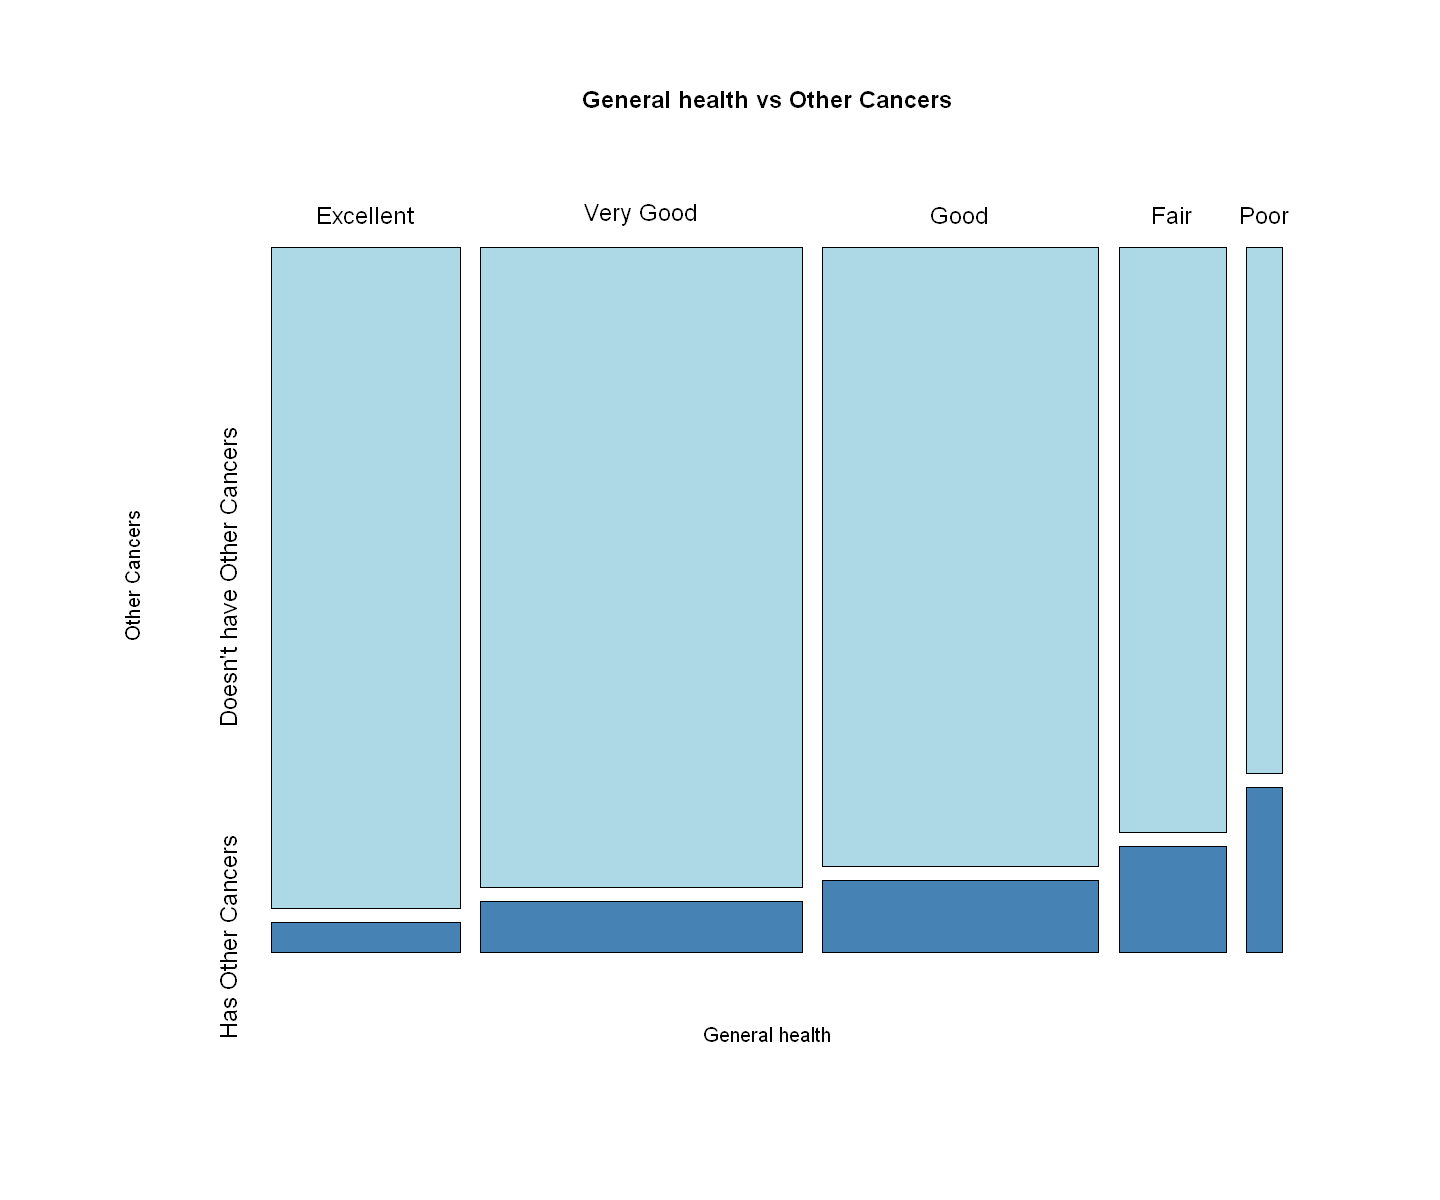

In [13]:
options(repr.plot.width=12, repr.plot.height=10, repr.plot.pointsize=24)
mosaicplot( ~ GENHLTH + CHCOCNCR, 
           data = ourdata, 
           xlab = "General health", 
           ylab = "Other Cancers", 
           color = c("lightblue", "steelblue"),
           main = "General health vs Other Cancers",
           cex=1.2
           )

In [14]:
(round(prop.table(table(ourdata$GENHLTH, ourdata$CHCOCNCR), margin = 1),2))

           
            Doesn't have Other Cancers Has Other Cancers
  Excellent                       0.96              0.04
  Very Good                       0.93              0.07
  Good                            0.90              0.10
  Fair                            0.85              0.15
  Poor                            0.76              0.24

In [15]:
### Seeing the proportion of people reporting their general health as above good ###
(length(which(ourdata$GENHLTH=="Excellent" | ourdata$GENHLTH=="Very Good" | ourdata$GENHLTH=="Good")))/length(ourdata$GENHLTH)

[1] 0.8465113

#### General Health vs Arthritis

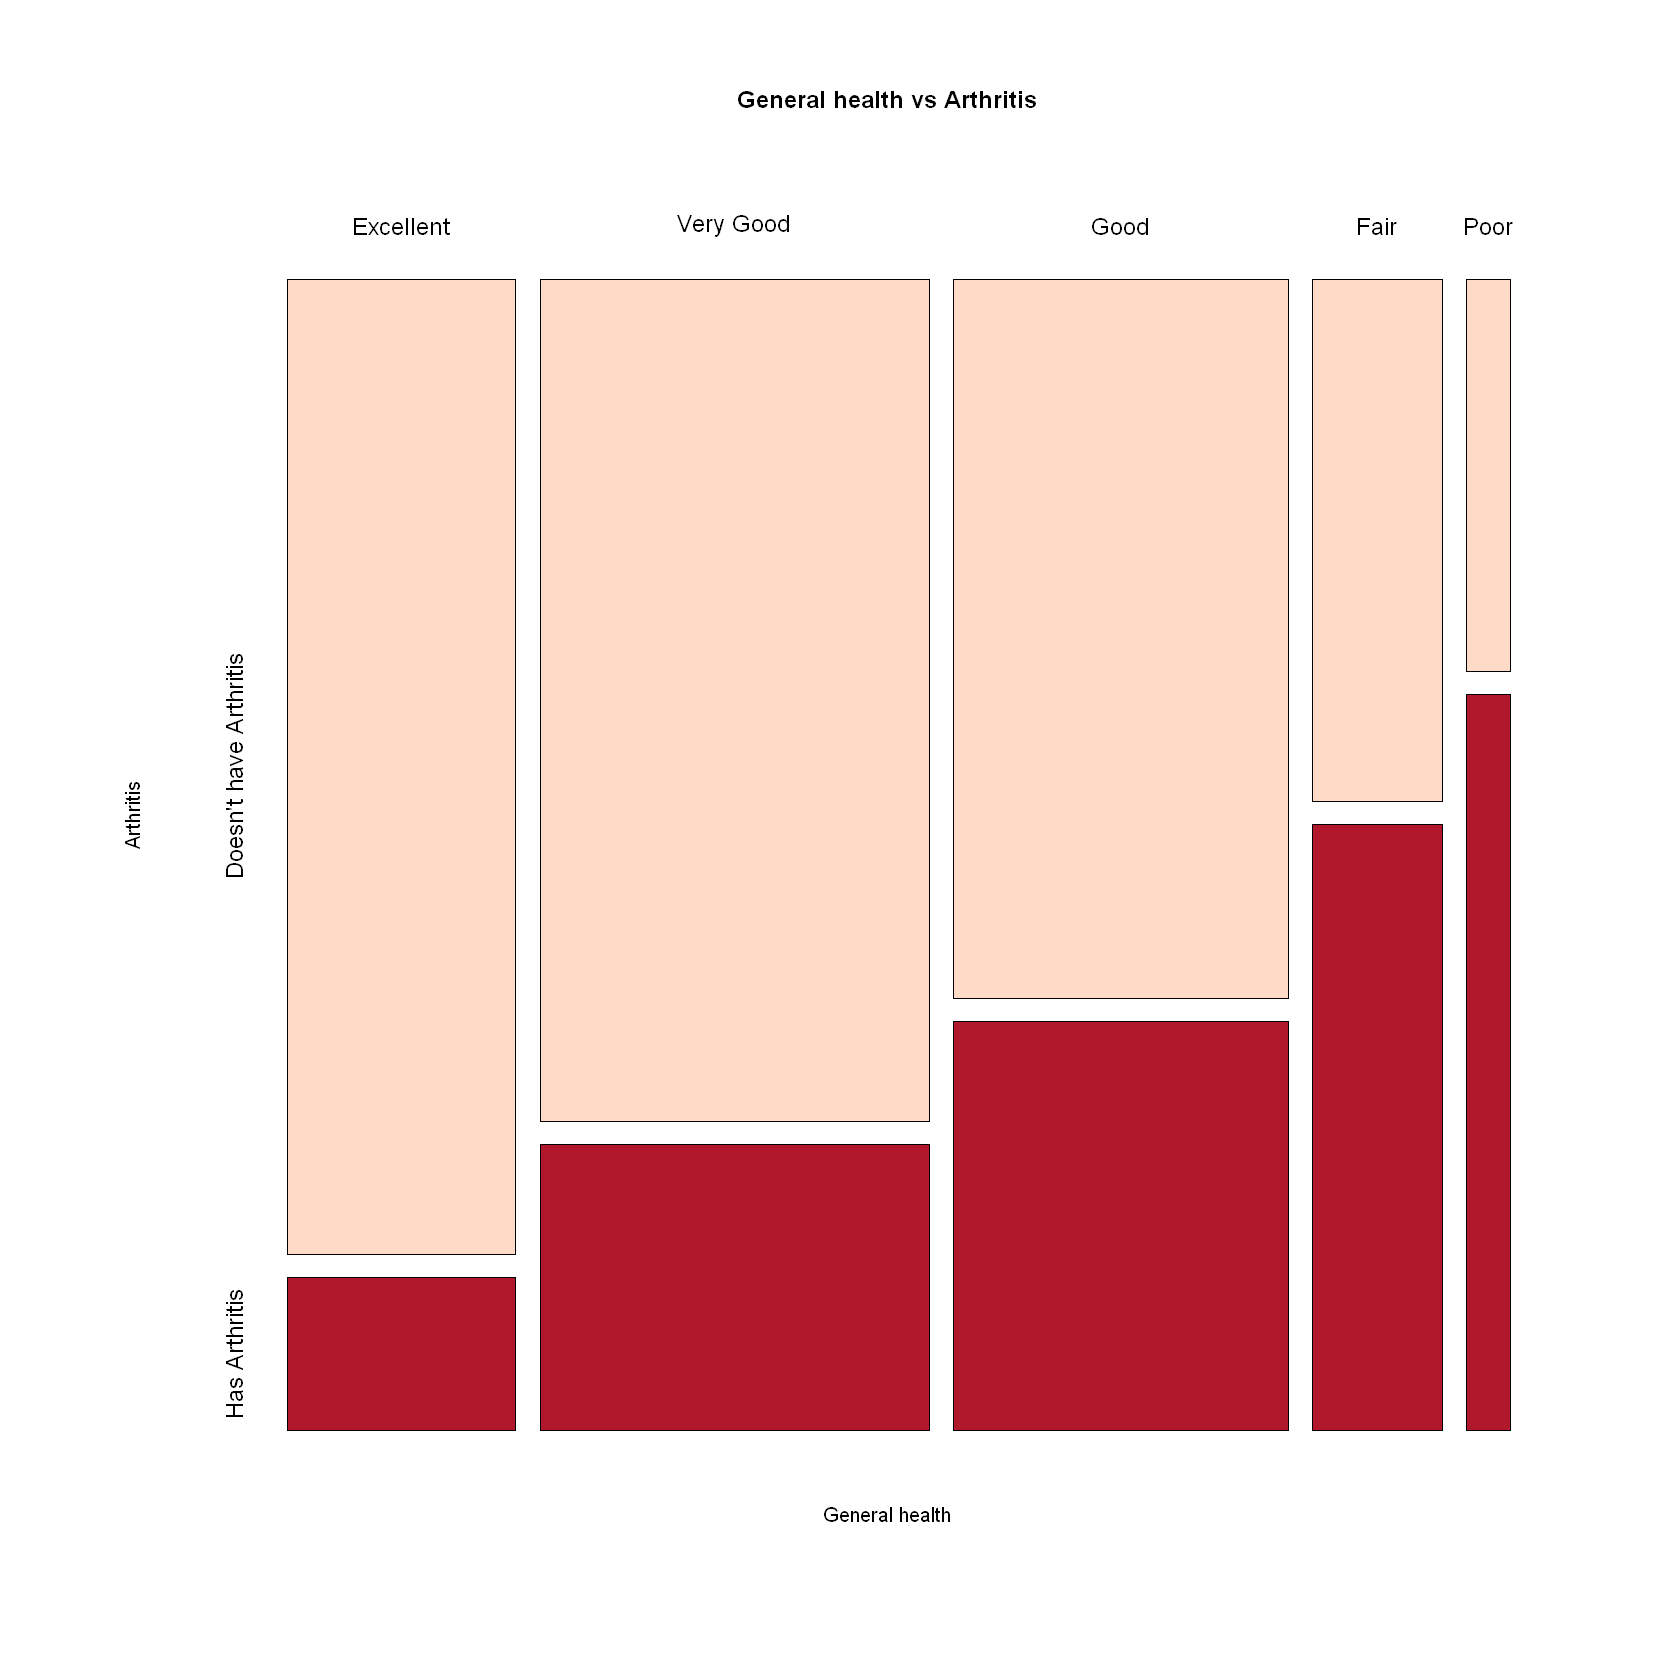

In [16]:
options(repr.plot.width=14, repr.plot.height=14, repr.plot.pointsize=24)
mosaicplot( ~ GENHLTH + HAVARTH4, 
           data = ourdata, 
           xlab = "General health", 
           ylab = "Arthritis", 
           color = c("#FDDBC7", "#B2182B"),
           main = "General health vs Arthritis",
           cex=1.2
           )

#### Income vs Arthritis

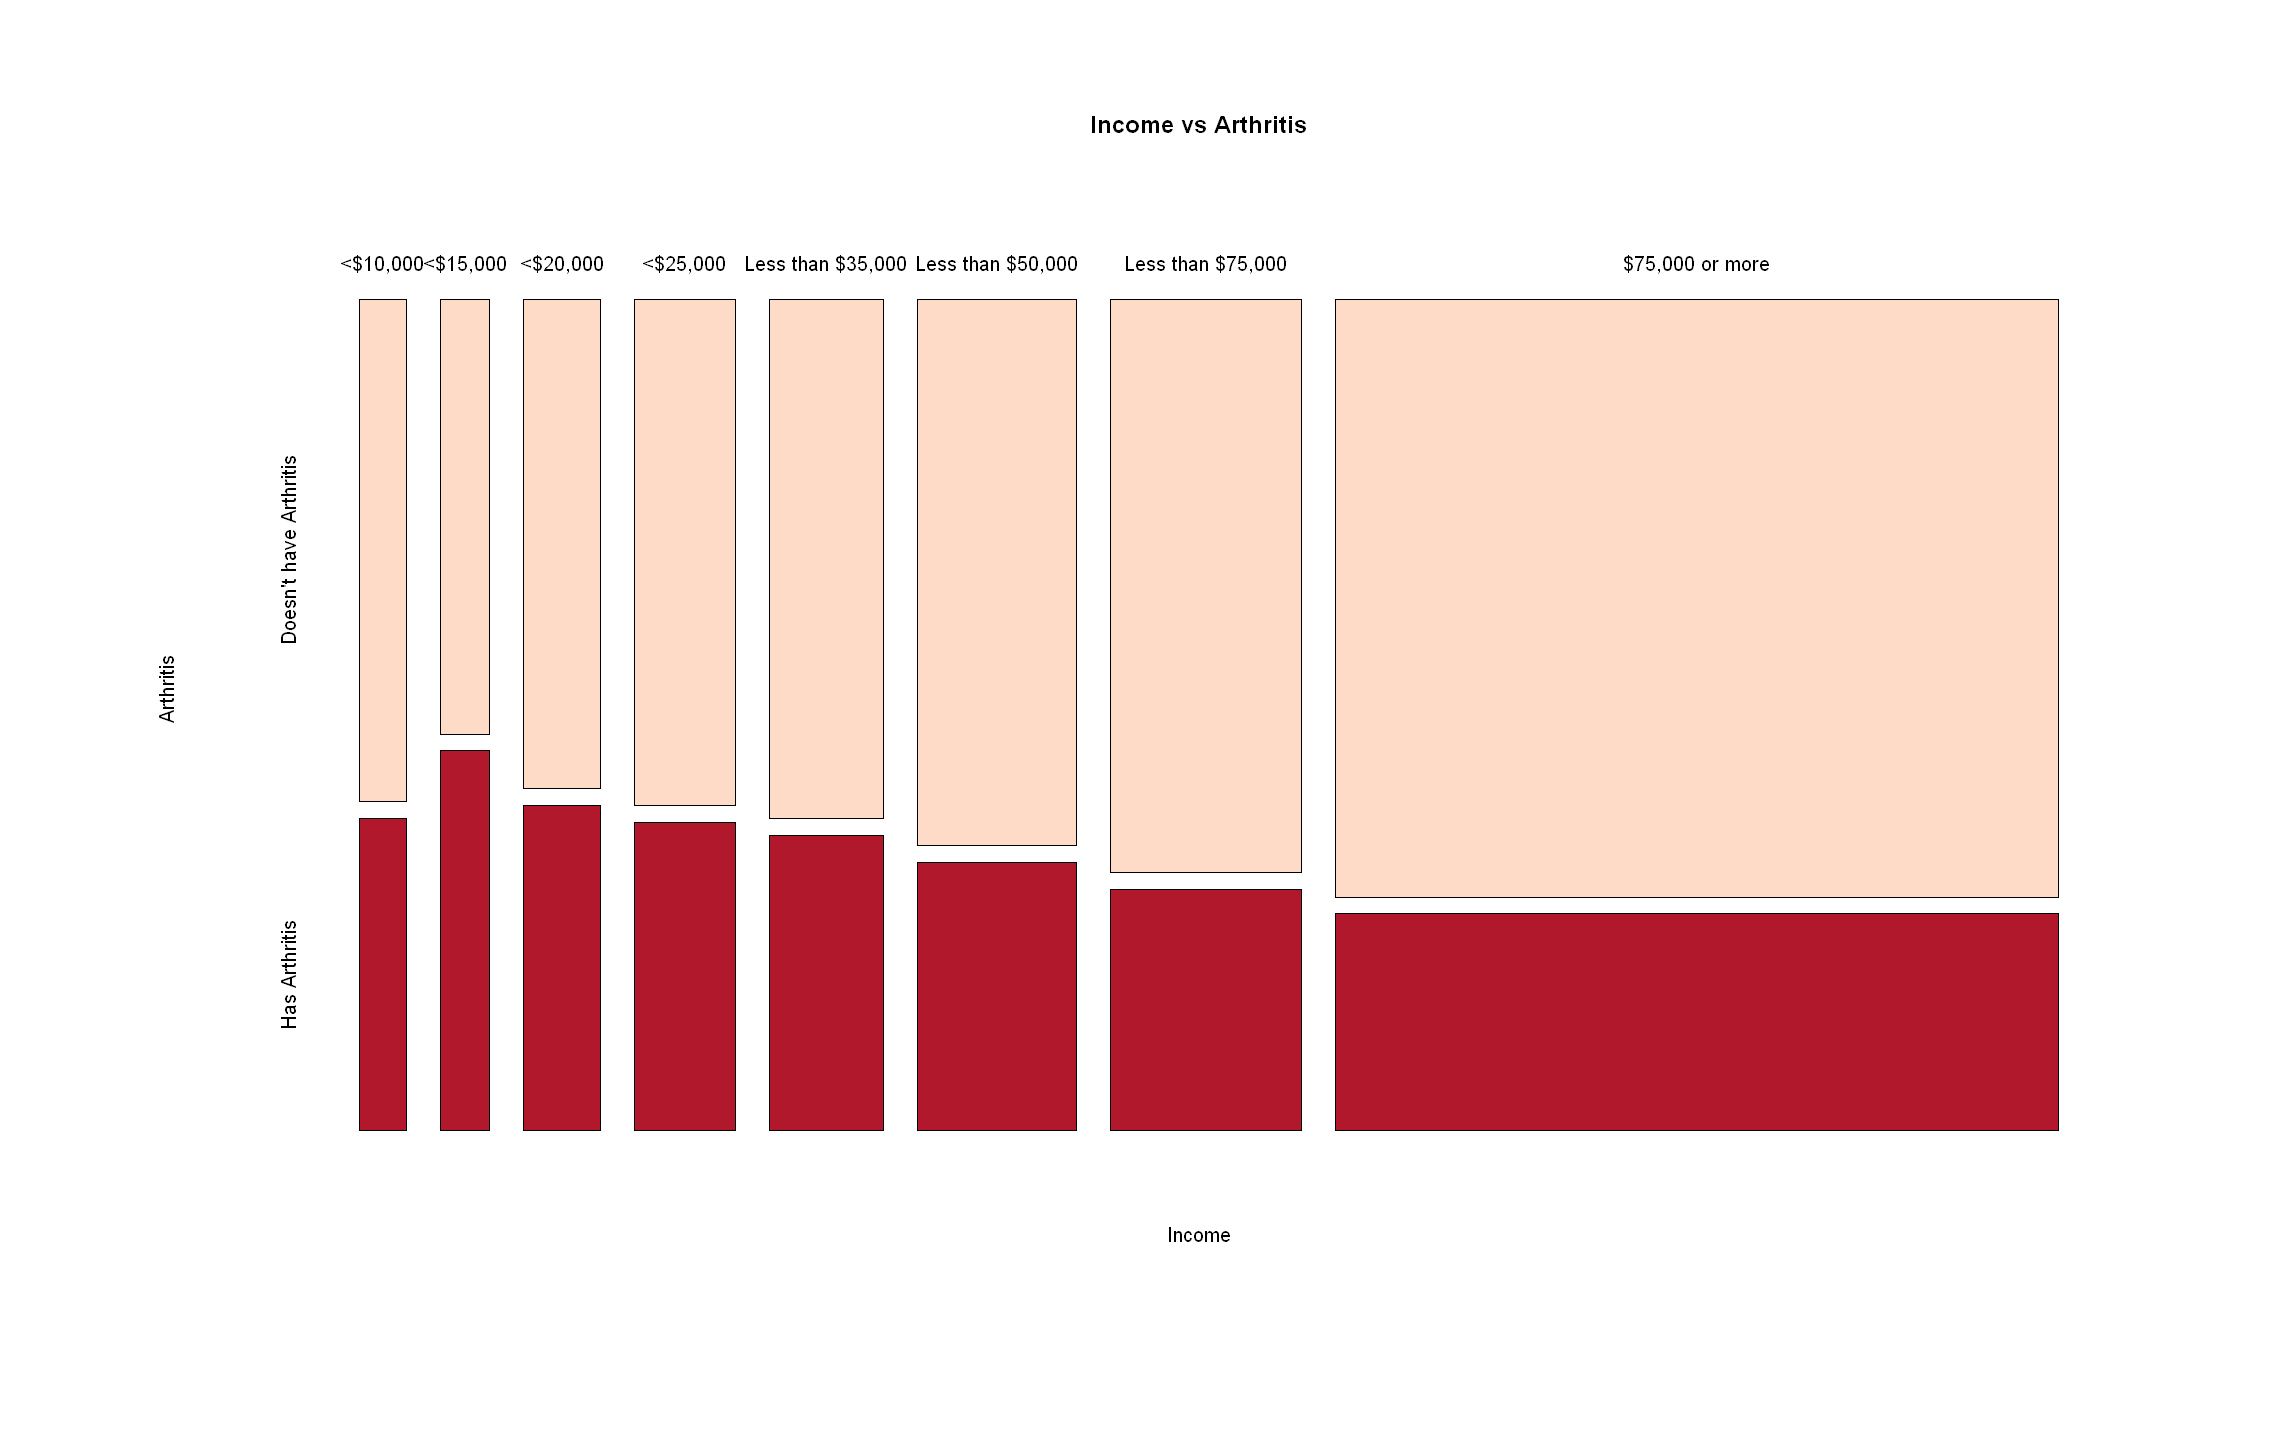

In [17]:
options(repr.plot.width=19, repr.plot.height=12, repr.plot.pointsize=30,repr.plot.res=120)
mosaicplot( ~ INCOME2 + HAVARTH4, 
           data = ourdata, 
           xlab = "Income", 
           ylab = "Arthritis", 
           color = c("#FDDBC7", "#B2182B"),
           main = "Income vs Arthritis",
           cex=1
           )

In [18]:
(round(prop.table(table(ourdata$INCOME2, ourdata$HAVARTH4), margin = 1),2))

                   
                    Doesn't have Arthritis Has Arthritis
  <$10,000                            0.62          0.38
  <$15,000                            0.53          0.47
  <$20,000                            0.60          0.40
  <$25,000                            0.62          0.38
  Less than $35,000                   0.64          0.36
  Less than $50,000                   0.67          0.33
  Less than $75,000                   0.70          0.30
  $75,000 or more                     0.73          0.27

#### Income vs Skin Cancer

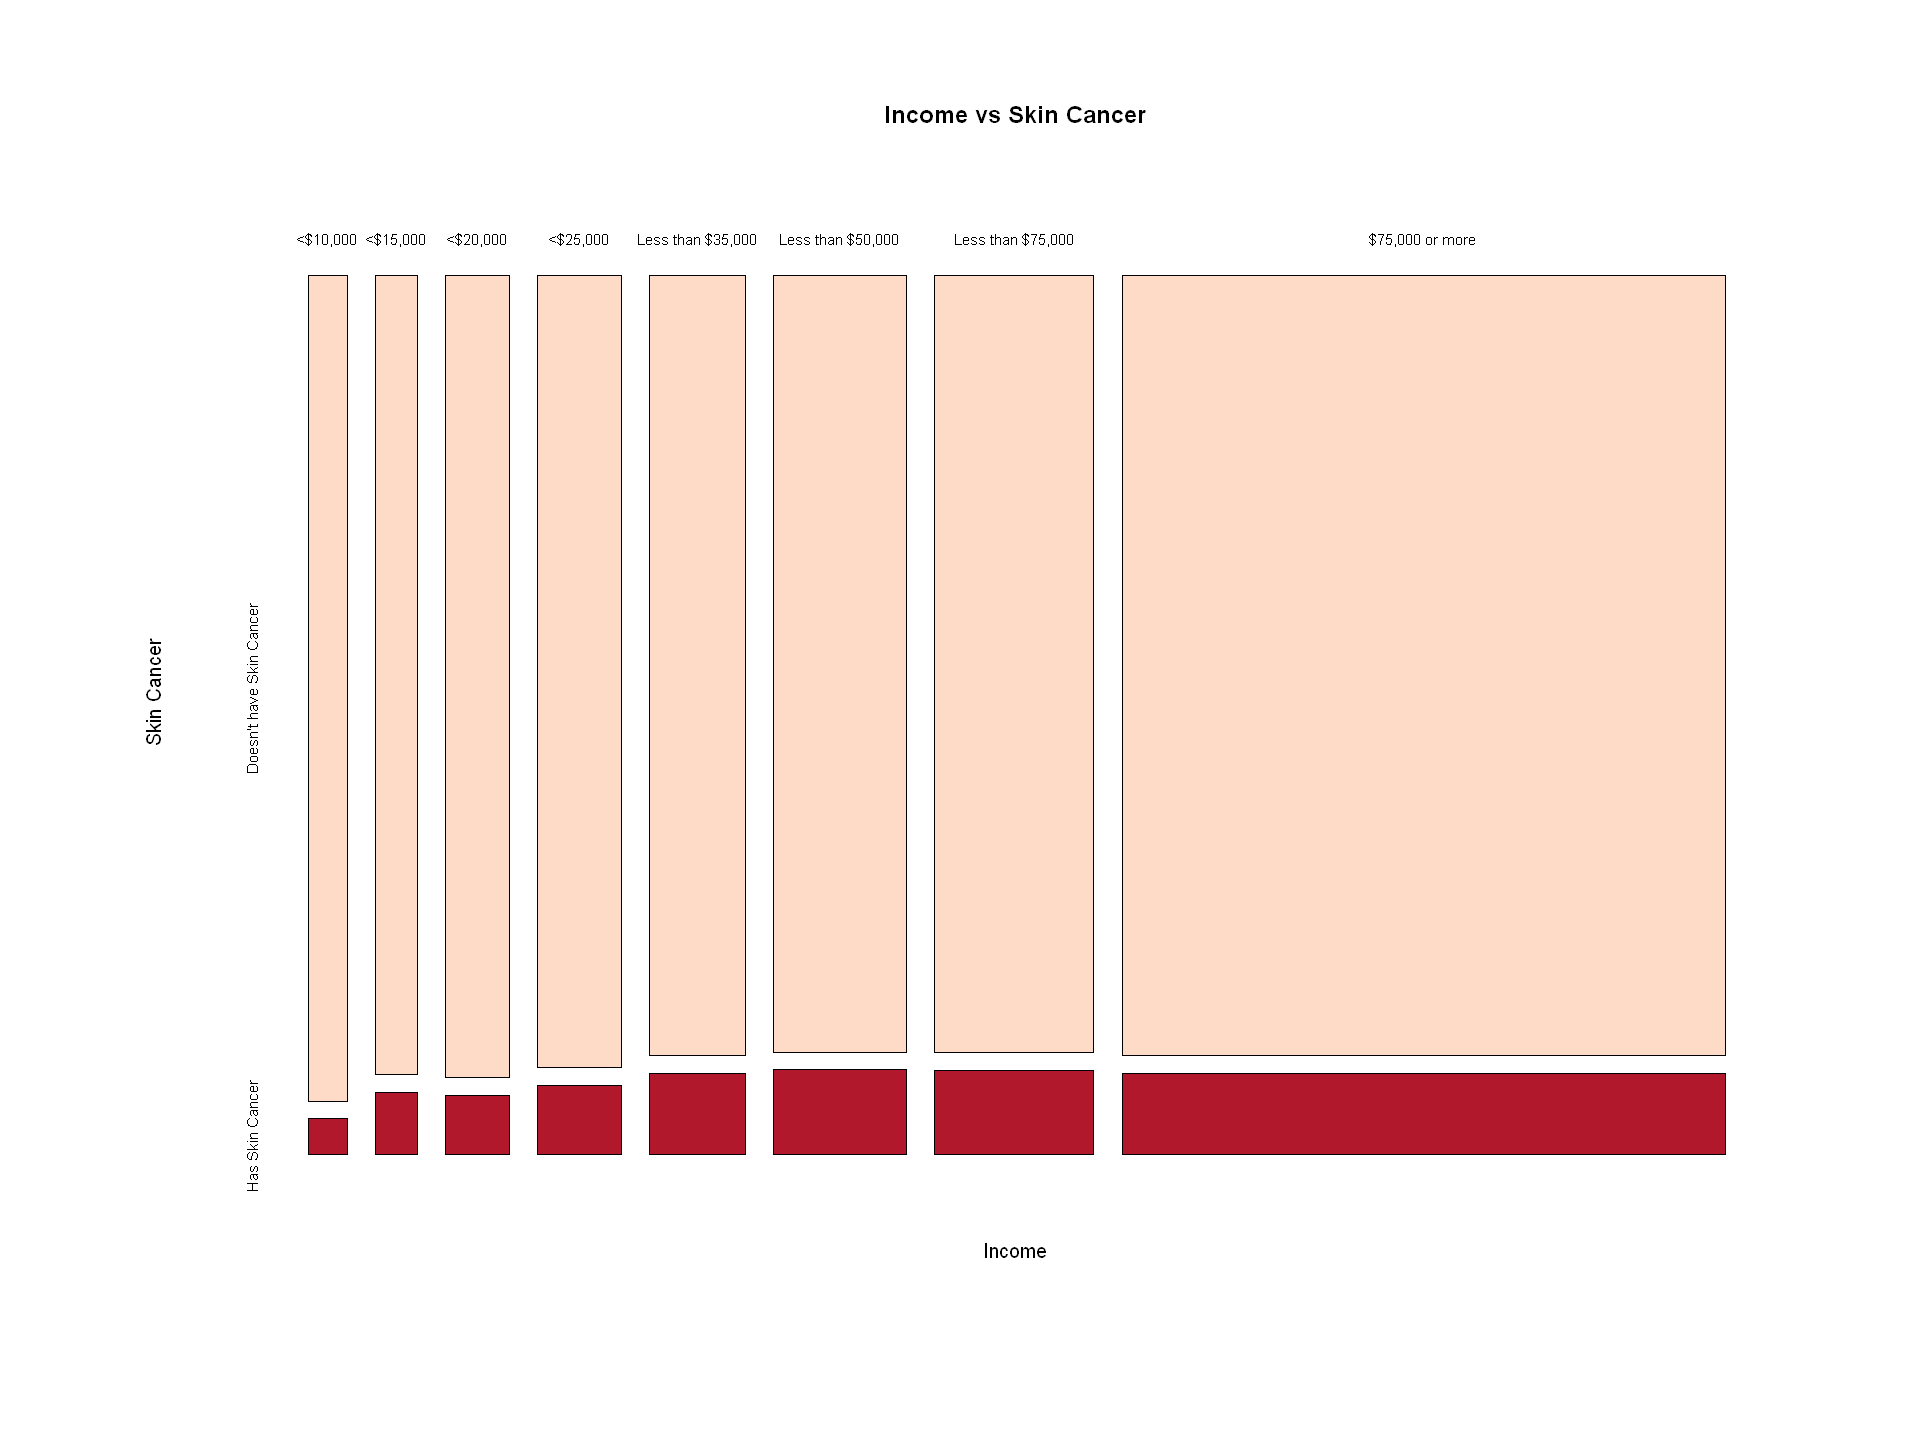

In [19]:
options(repr.plot.width=16, repr.plot.height=12, repr.plot.pointsize=28)
mosaicplot( ~ INCOME2 + CHCSCNCR, 
           data = ourdata, 
           xlab = "Income", 
           ylab = "Skin Cancer", 
           color = c("#FDDBC7", "#B2182B"),
           main = "Income vs Skin Cancer",
           cex=0.75
           )

#### Income vs Diabetes

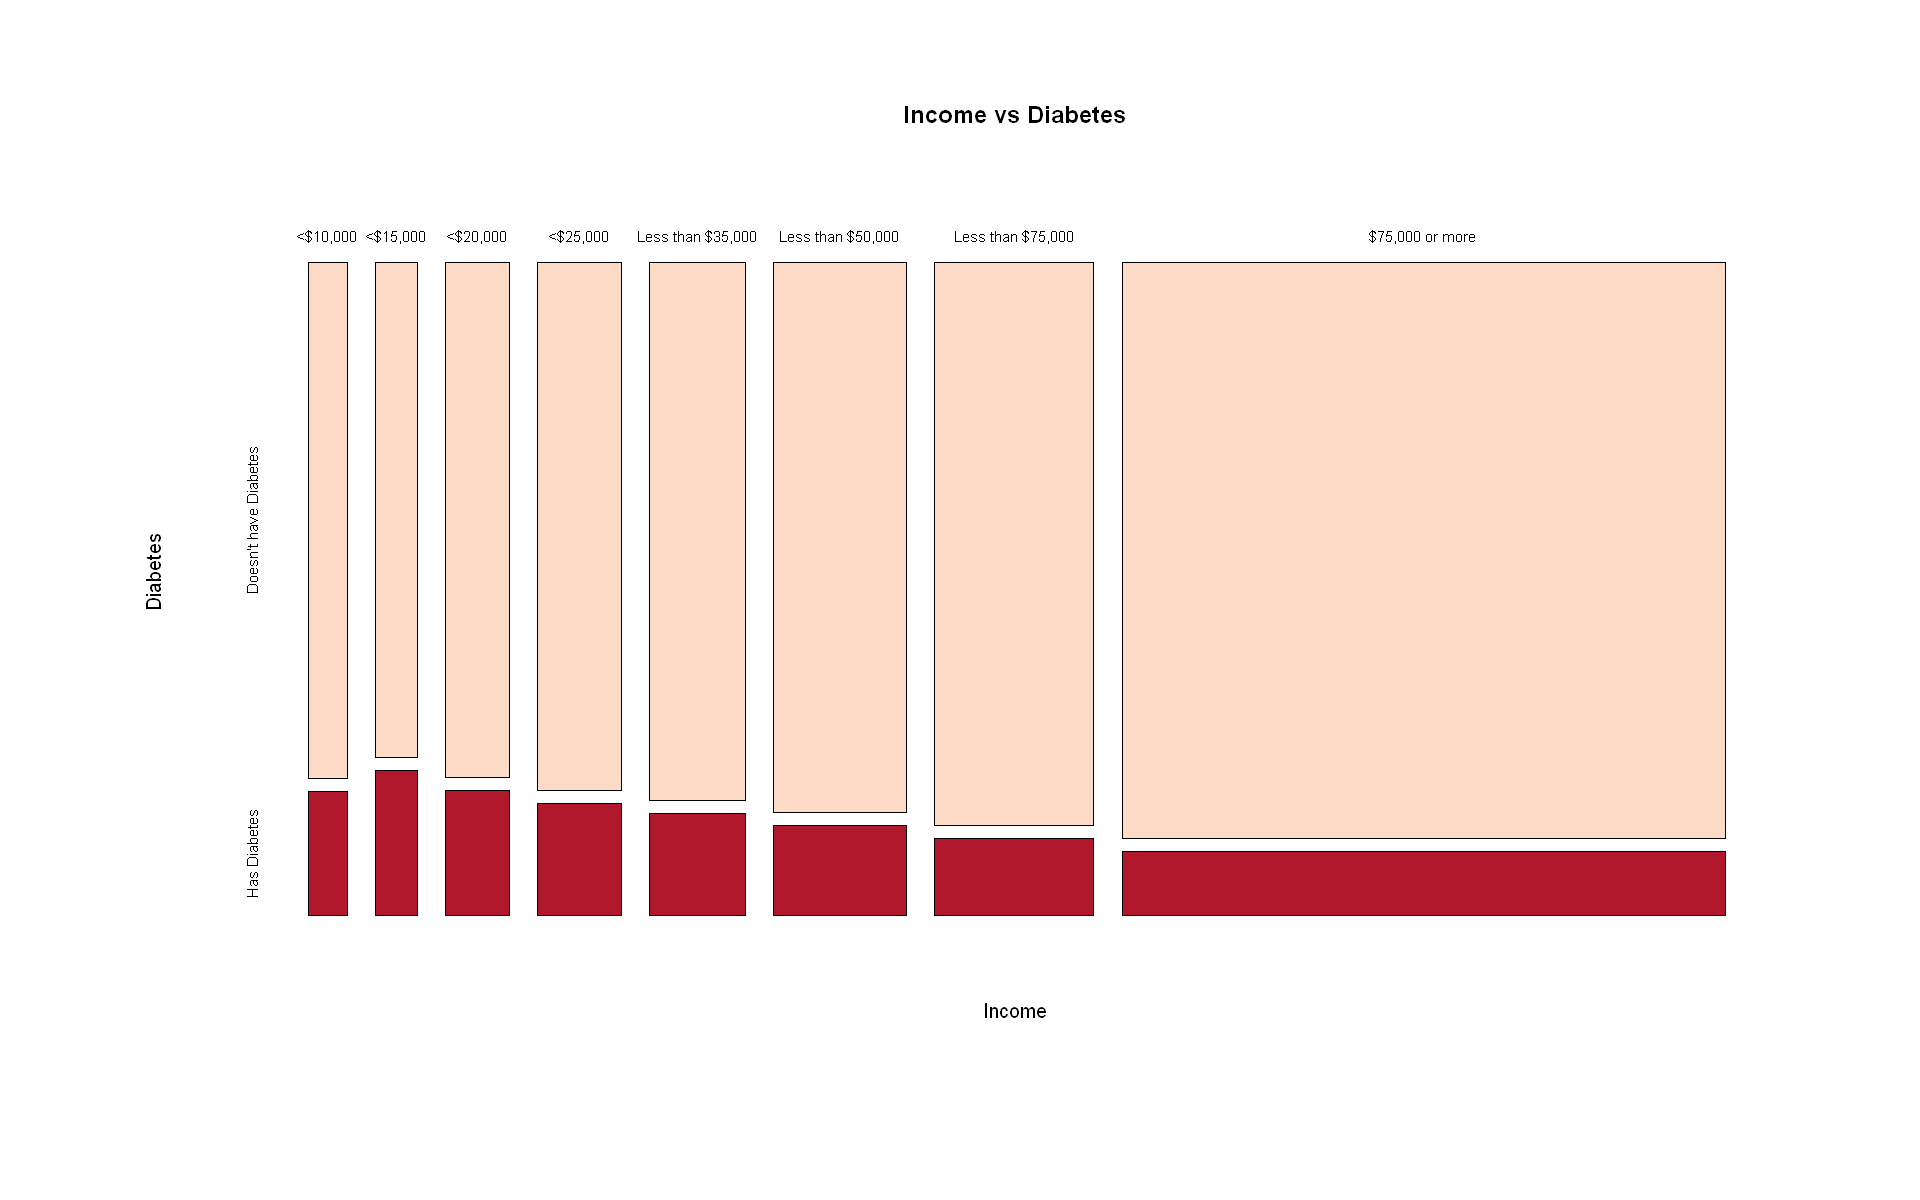

In [20]:
options(repr.plot.width=16, repr.plot.height=10, repr.plot.pointsize=28, repr.plot.res=120)
mosaicplot( ~ INCOME2 + DIABETE4, 
           data = ourdata, 
           xlab = "Income", 
           ylab = "Diabetes", 
           color = c("#FDDBC7", "#B2182B"),
           main = "Income vs Diabetes",
           cex=0.75
           )

#### General Health vs Diabetes

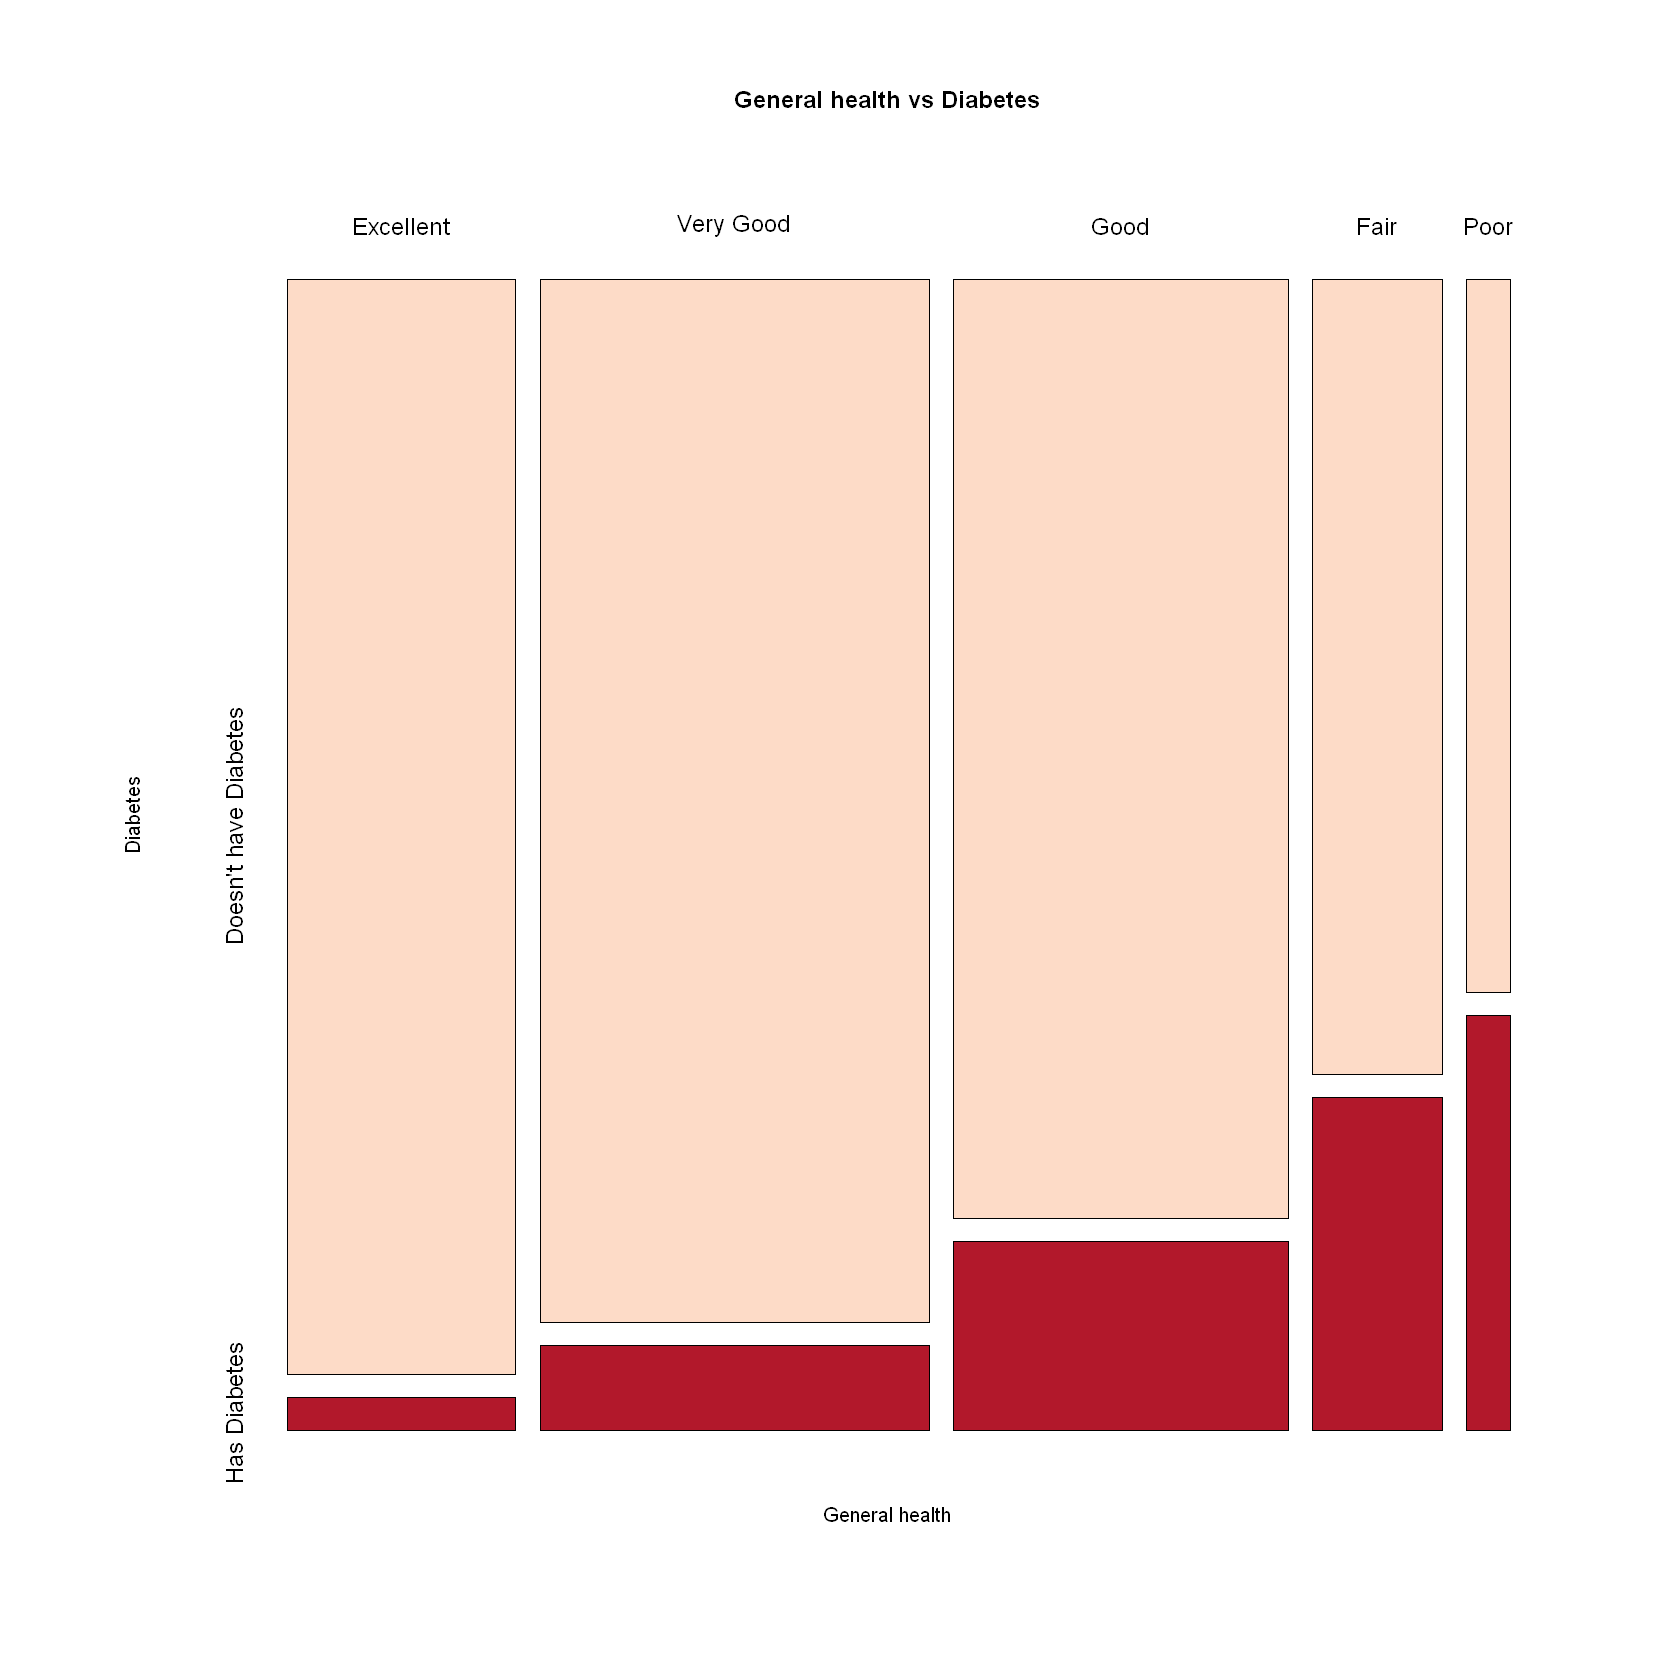

In [21]:
options(repr.plot.width=14, repr.plot.height=14, repr.plot.pointsize=24)
mosaicplot( ~ GENHLTH + DIABETE4, 
           data = ourdata, 
           xlab = "General health", 
           ylab = "Diabetes", 
           color = c("#FDDBC7", "#B2182B"),
           main = "General health vs Diabetes",
           cex=1.2
           )

#### General Health vs Exercise

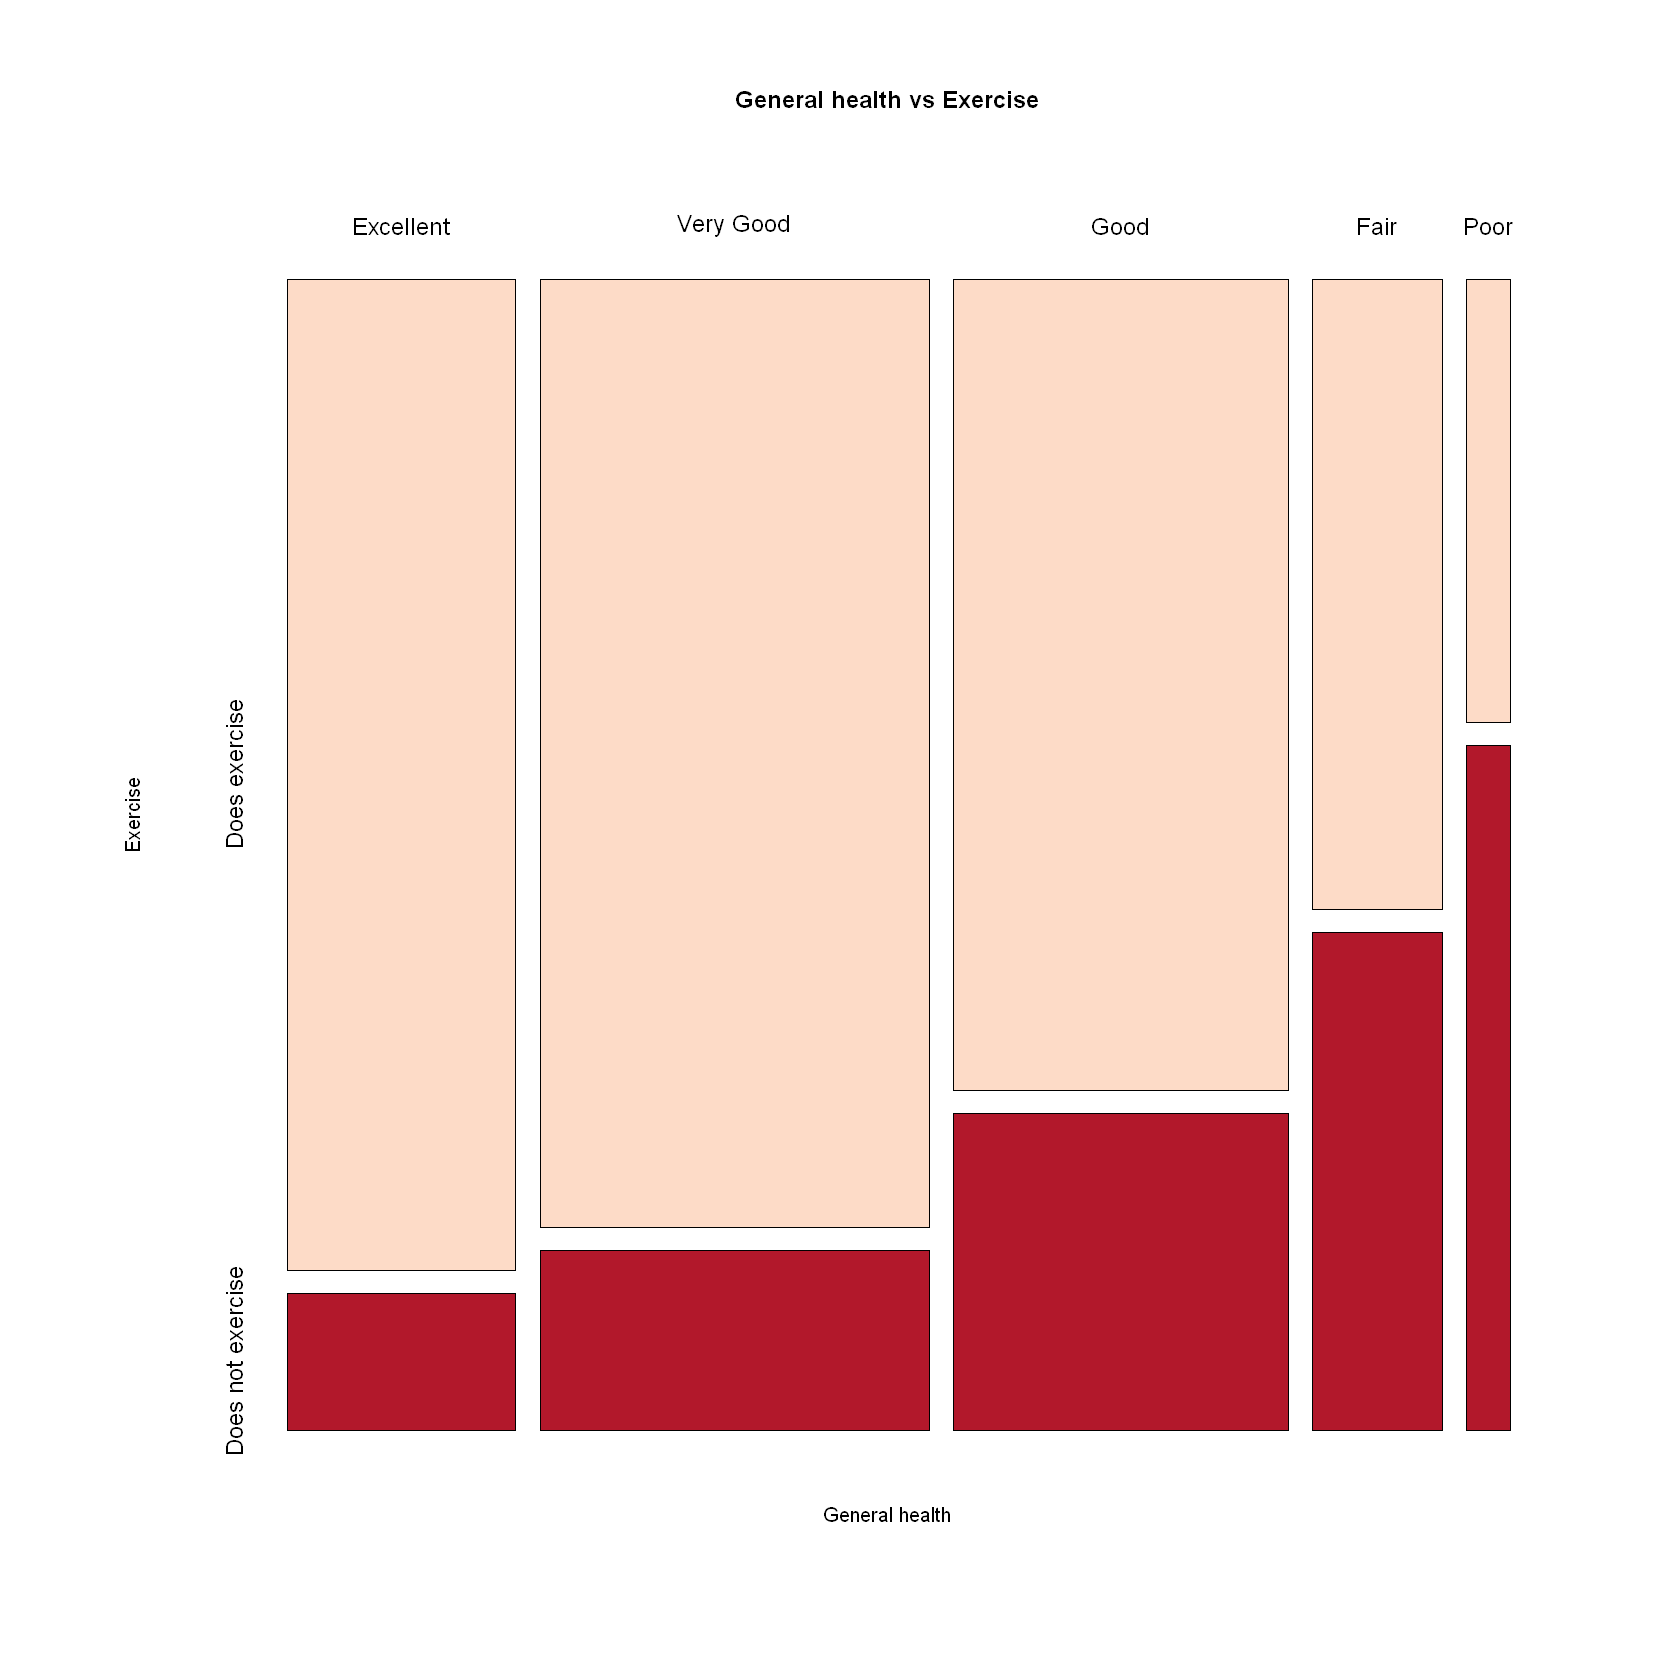

In [22]:
options(repr.plot.width=14, repr.plot.height=14, repr.plot.pointsize=24)
mosaicplot( ~ GENHLTH + EXERANY2, 
           data = ourdata, 
           xlab = "General health", 
           ylab = "Exercise", 
           color = c("#FDDBC7", "#B2182B"),
           main = "General health vs Exercise",
           cex=1.2
           )

#### CVD vs Exercise

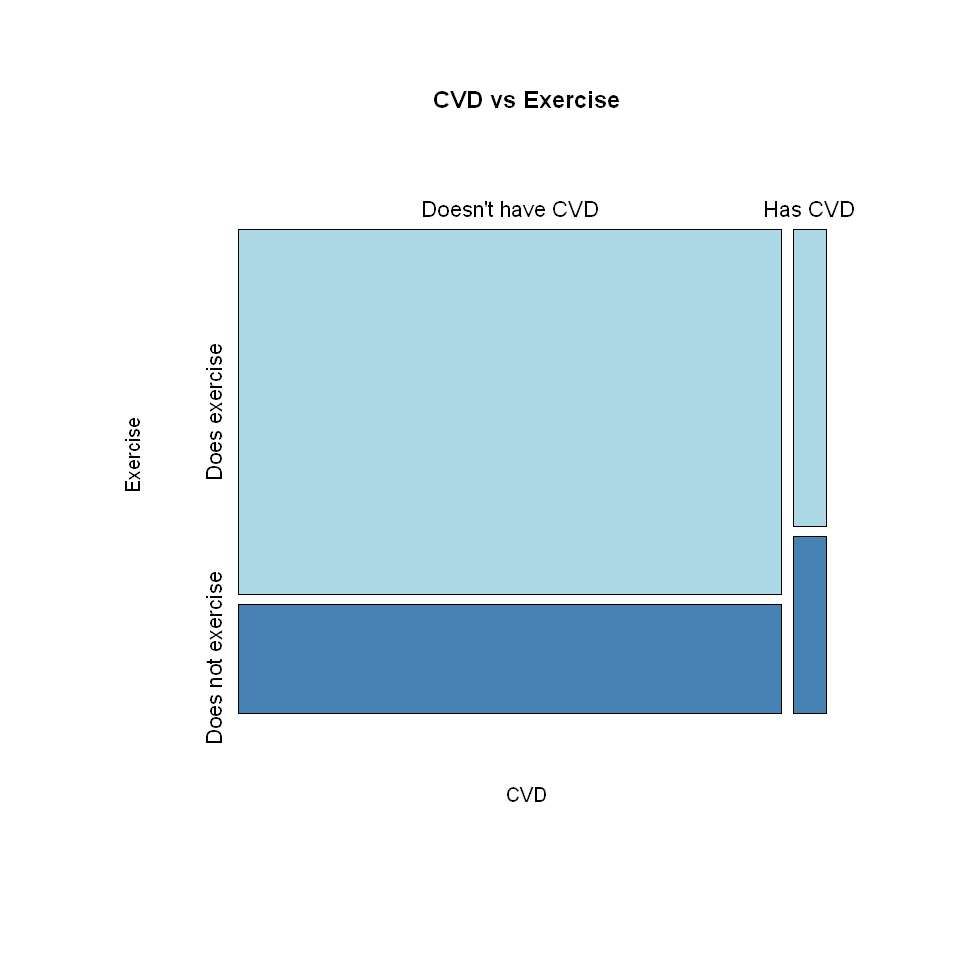

In [23]:
options(repr.plot.width=8, repr.plot.height=8)
mosaicplot( ~ CVDCRHD4 + EXERANY2, 
           data = ourdata, 
           xlab = "CVD", 
           ylab = "Exercise", 
           color = c("lightblue", "steelblue"), 
           main = "CVD vs Exercise",
           cex = 1.1
           )

In [24]:
t(round(prop.table(table(ourdata$CVDCRHD4, ourdata$EXERANY2), margin = 1),2))

                   
                    Doesn't have CVD Has CVD
  Does exercise                 0.77    0.63
  Does not exercise             0.23    0.37

#### CVD vs Exercise

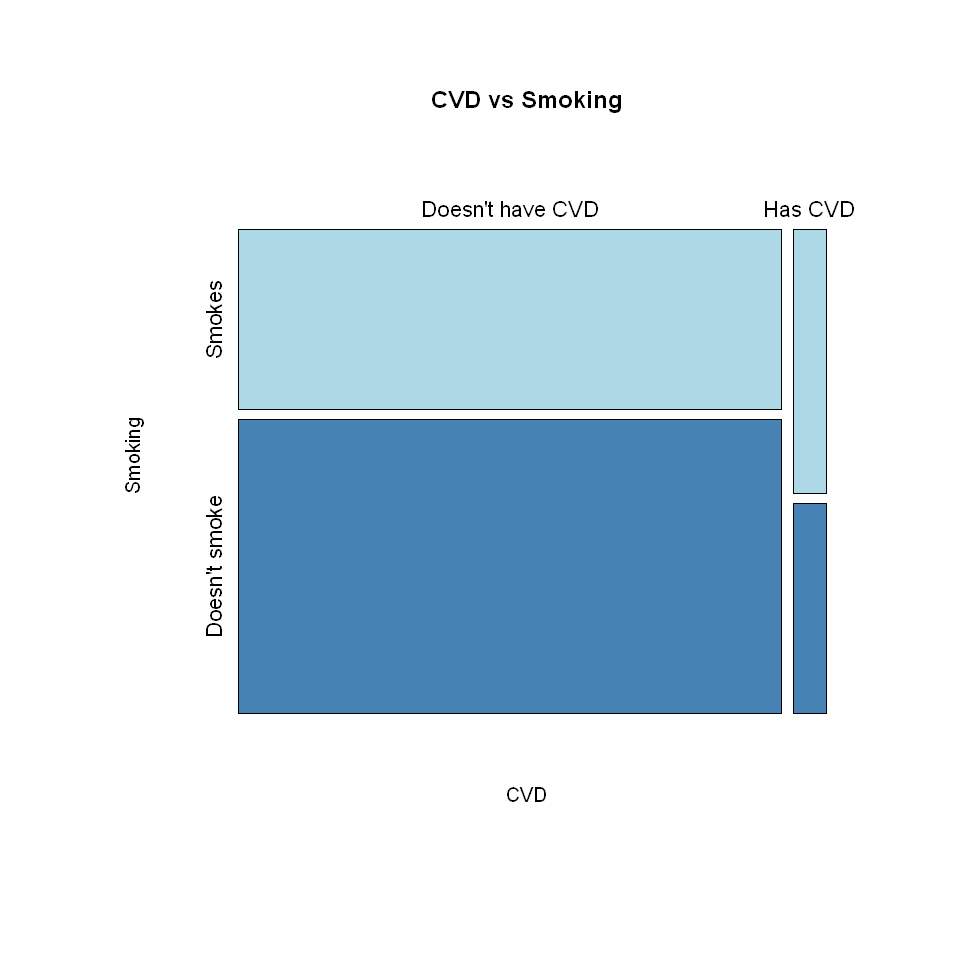

In [25]:
mosaicplot( ~ CVDCRHD4 + SMOKE100, 
           data = ourdata, 
           xlab = "CVD", 
           ylab = "Smoking", 
           color = c("lightblue", "steelblue"), 
           main = "CVD vs Smoking",
           cex = 1.1
           )

In [26]:
t(round(prop.table(table(ourdata$CVDCRHD4, ourdata$SMOKE100), margin = 1),2))

               
                Doesn't have CVD Has CVD
  Smokes                    0.38    0.56
  Doesn't smoke             0.62    0.44

#### Pulmonary Disease vs Smoking

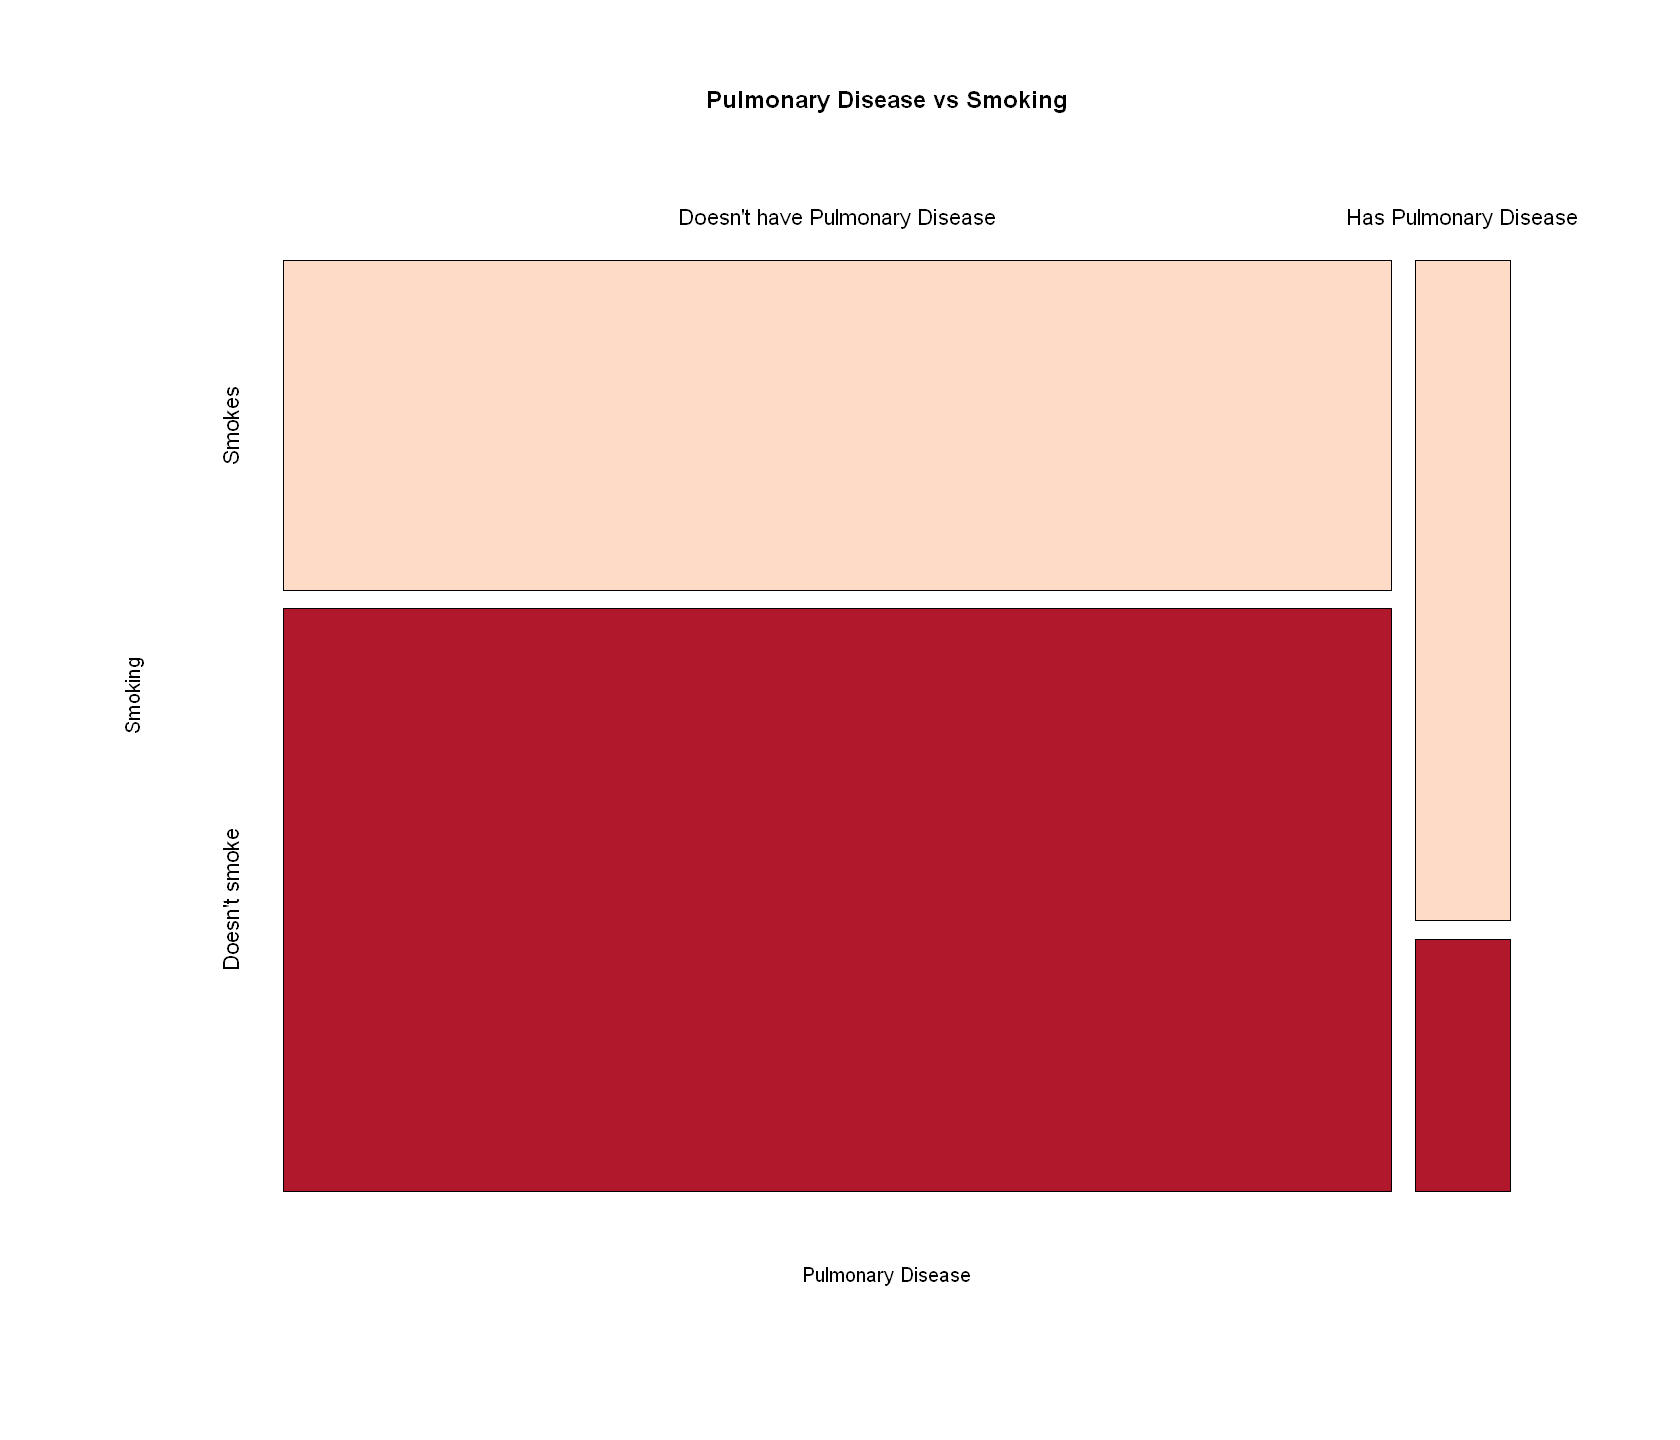

In [27]:
options(repr.plot.width=14, repr.plot.height=12)
mosaicplot( ~ CHCCOPD2 + SMOKE100, 
           data = ourdata, 
           xlab = "Pulmonary Disease", 
           ylab = "Smoking", 
           color = c("#FDDBC7", "#B2182B"), 
           main = "Pulmonary Disease vs Smoking",
           cex = 1.1
           )

It might be interesting here to actually calulate the proportions of people who smoke for each group

In [28]:
t(round(prop.table(table(ourdata$CHCCOPD2, ourdata$SMOKE100), margin = 1),2))

               
                Doesn't have Pulmonary Disease Has Pulmonary Disease
  Smokes                                  0.36                  0.72
  Doesn't smoke                           0.64                  0.28

### Continuous Features

For better interpretation we work with the cleaned but not normalised data

In [31]:
before_norm <- read.csv("datapreprocessednotnormalized.csv")

In [32]:
### Converting feature labels for better interpretation ###

before_norm$CHCKDNY2 <- factor(before_norm$CHCKDNY2, labels=c("Has Kidney Disease", "Doesn't have Kidney Disease"))
before_norm$CHCSCNCR <- factor(before_norm$CHCSCNCR, labels=c("Has Skin Cancer", "Doesn't have Skin Cancer"))
before_norm$DIABETE4 <- factor(before_norm$DIABETE4, labels=c("Has Diabetes", "Doesn't have Diabetes"))

before_norm$AGEG5YR <- as.numeric(as.vector(factor(before_norm$AGEG5YR, labels=c(21, 27,33,39,45,51,57,63,69,75,81,87,93))))
before_norm$BMI5 <- 0.01*before_norm$BMI5 

Warning message:
"package 'plyr' was built under R version 4.0.5"


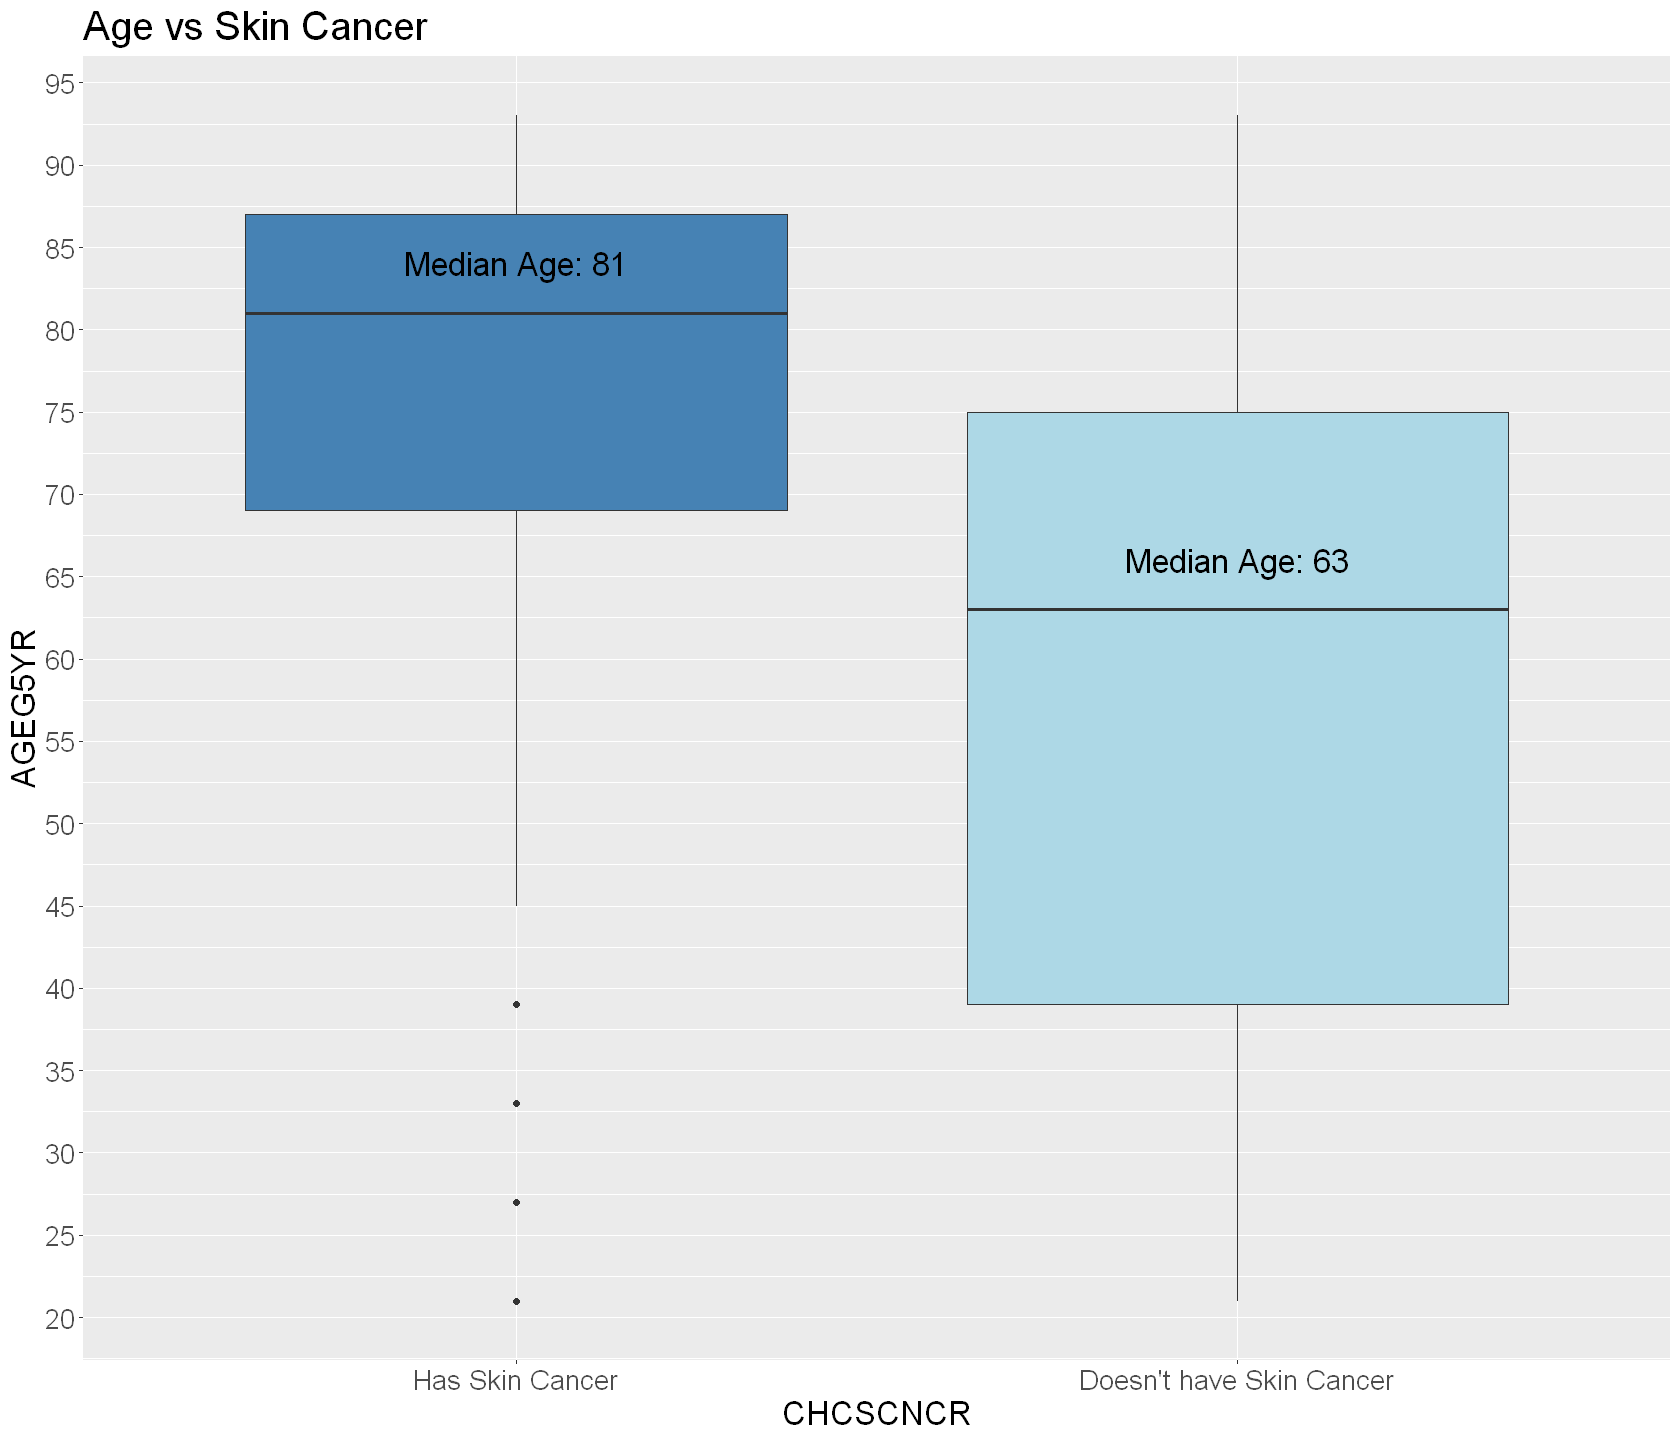

In [33]:
# AgevSkin box plot
library(plyr)
p_meds <- ddply(before_norm, .(CHCSCNCR), summarise, med = median(AGEG5YR))
ggplot(before_norm, aes(x = CHCSCNCR, y = AGEG5YR)) +
       geom_boxplot(fill=c("steelblue", "lightblue")) +
       geom_text(data = p_meds, aes(x = CHCSCNCR, y = med, 
                 label = paste("Median Age: ", med, sep="")), 
                 size = 7, vjust = -1.5) +
       ggtitle("Age vs Skin Cancer") +
       scale_y_continuous(breaks = seq(5, 100, 5))+
       theme(text = element_text(size = 20))

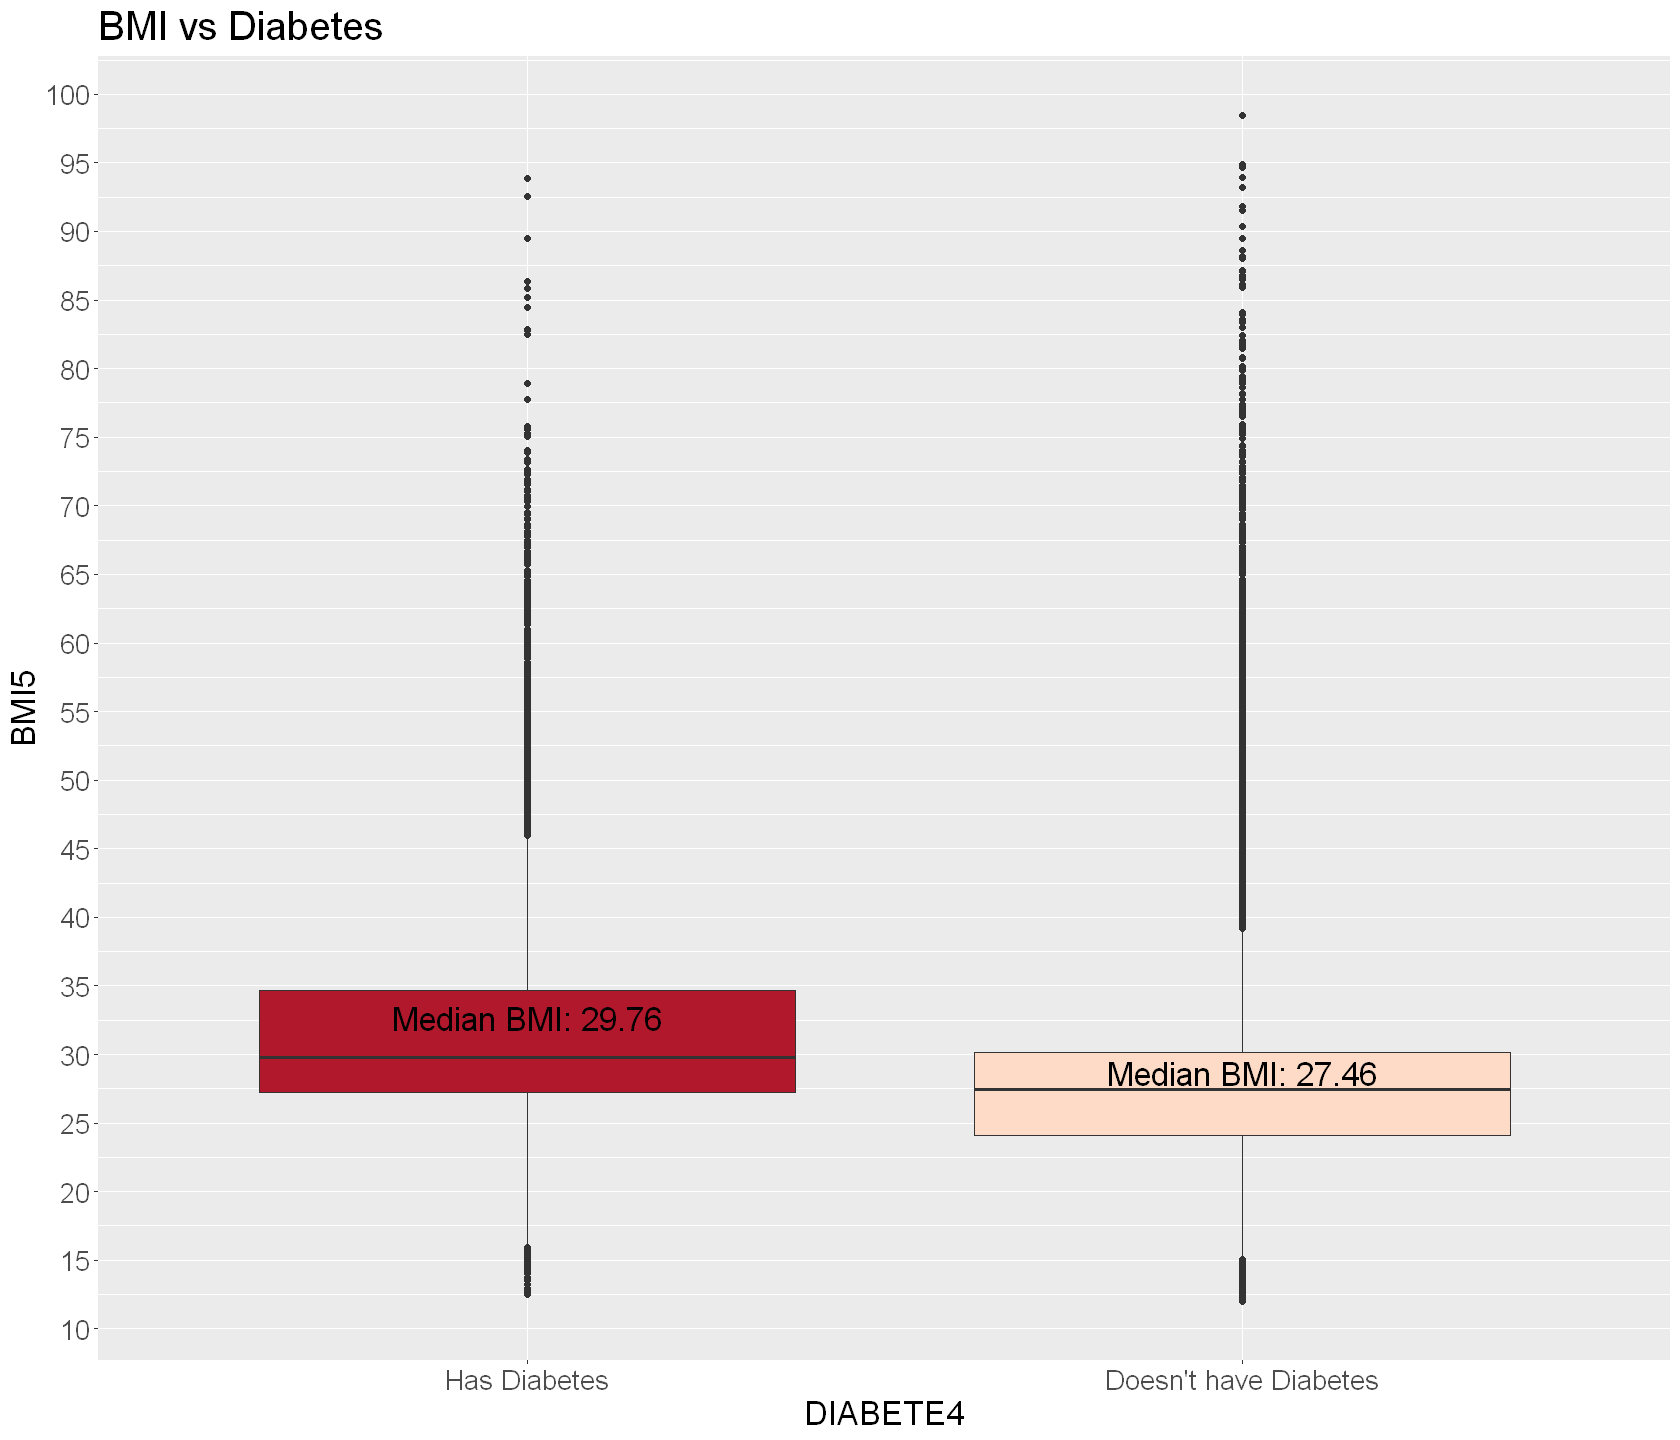

In [34]:
# BMIvDiab box plot
library(plyr)
p_meds <- ddply(before_norm, .(DIABETE4), summarise, med = median(BMI5))
ggplot(before_norm, aes(x = DIABETE4, y = BMI5)) +
       geom_boxplot(fill=c("#B2182B", "#FDDBC7")) +
       geom_text(data = p_meds, aes(x = DIABETE4, y = med, 
                 label = paste("Median BMI: ", med, sep="")), 
                 size = 7, vjust = c(-1.075, -0.15)) +
 scale_y_continuous(breaks = seq(5, 100, 5))+
       ggtitle("BMI vs Diabetes")+
       theme(text = element_text(size = 20))

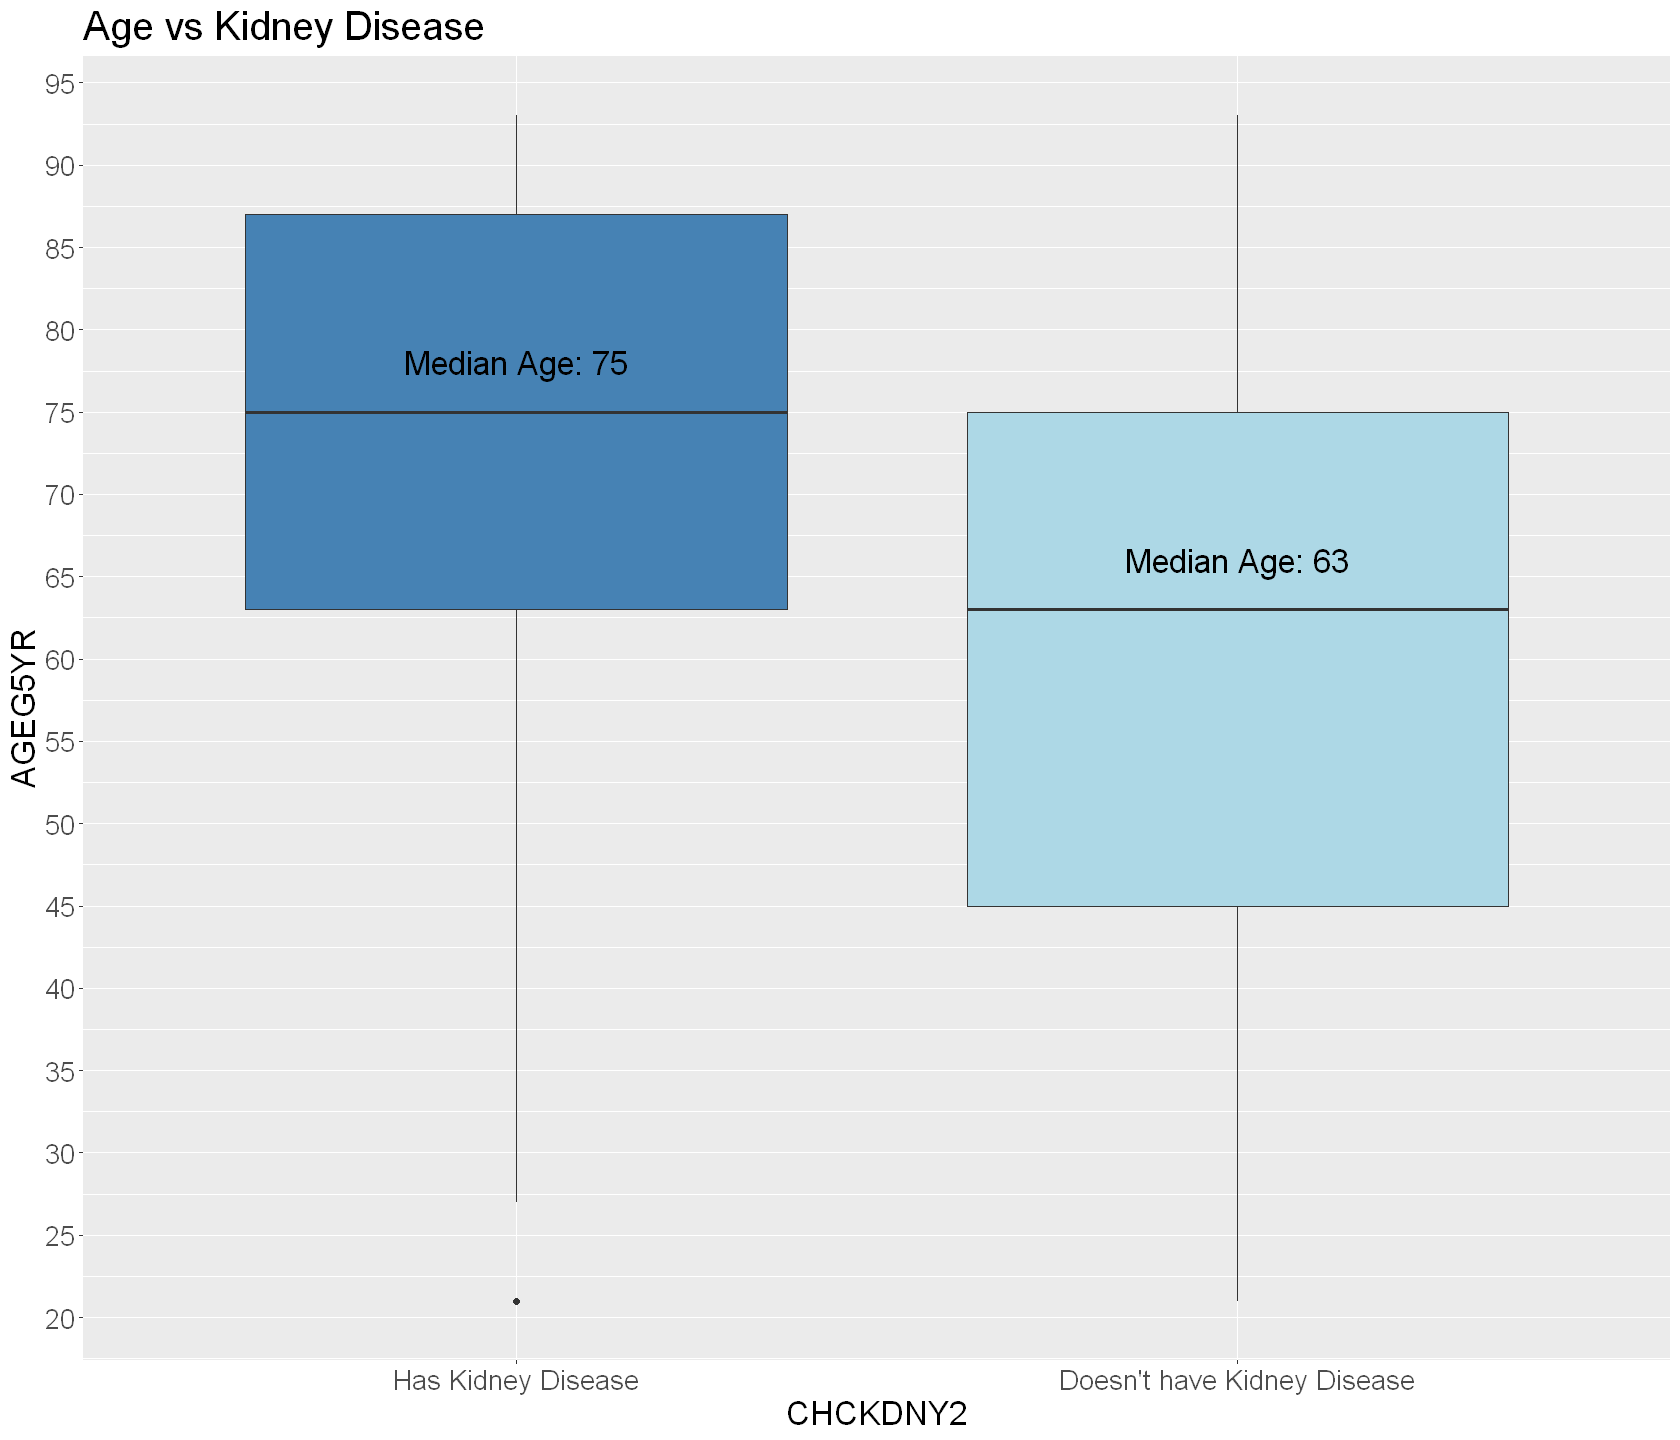

In [35]:
# AgevKidney
p_meds <- ddply(before_norm, .(CHCKDNY2), summarise, med = median(AGEG5YR))
ggplot(before_norm, aes(x = CHCKDNY2, y = AGEG5YR)) +
       geom_boxplot(fill=c("steelblue", "lightblue")) +
       geom_text(data = p_meds, aes(x = CHCKDNY2, y = med, 
                 label = paste("Median Age: ", med, sep="")), 
                 size = 7, vjust = -1.5) +
        ggtitle("Age vs Kidney Disease")+
 scale_y_continuous(breaks = seq(5, 100, 5))+
       theme(text = element_text(size = 20))

## Checking for correlation between input attributes and output variable

Checking if two categorical variables are independent can be done with Chi-Squared test of independence.

This is a typical Chi-Square test: if we assume that two variables are independent, then the values of the contingency table for these variables should be distributed uniformly. And then we check how far away from uniform the actual values are.

There also exists a Crammer's V that is a measure of correlation that follows from this test

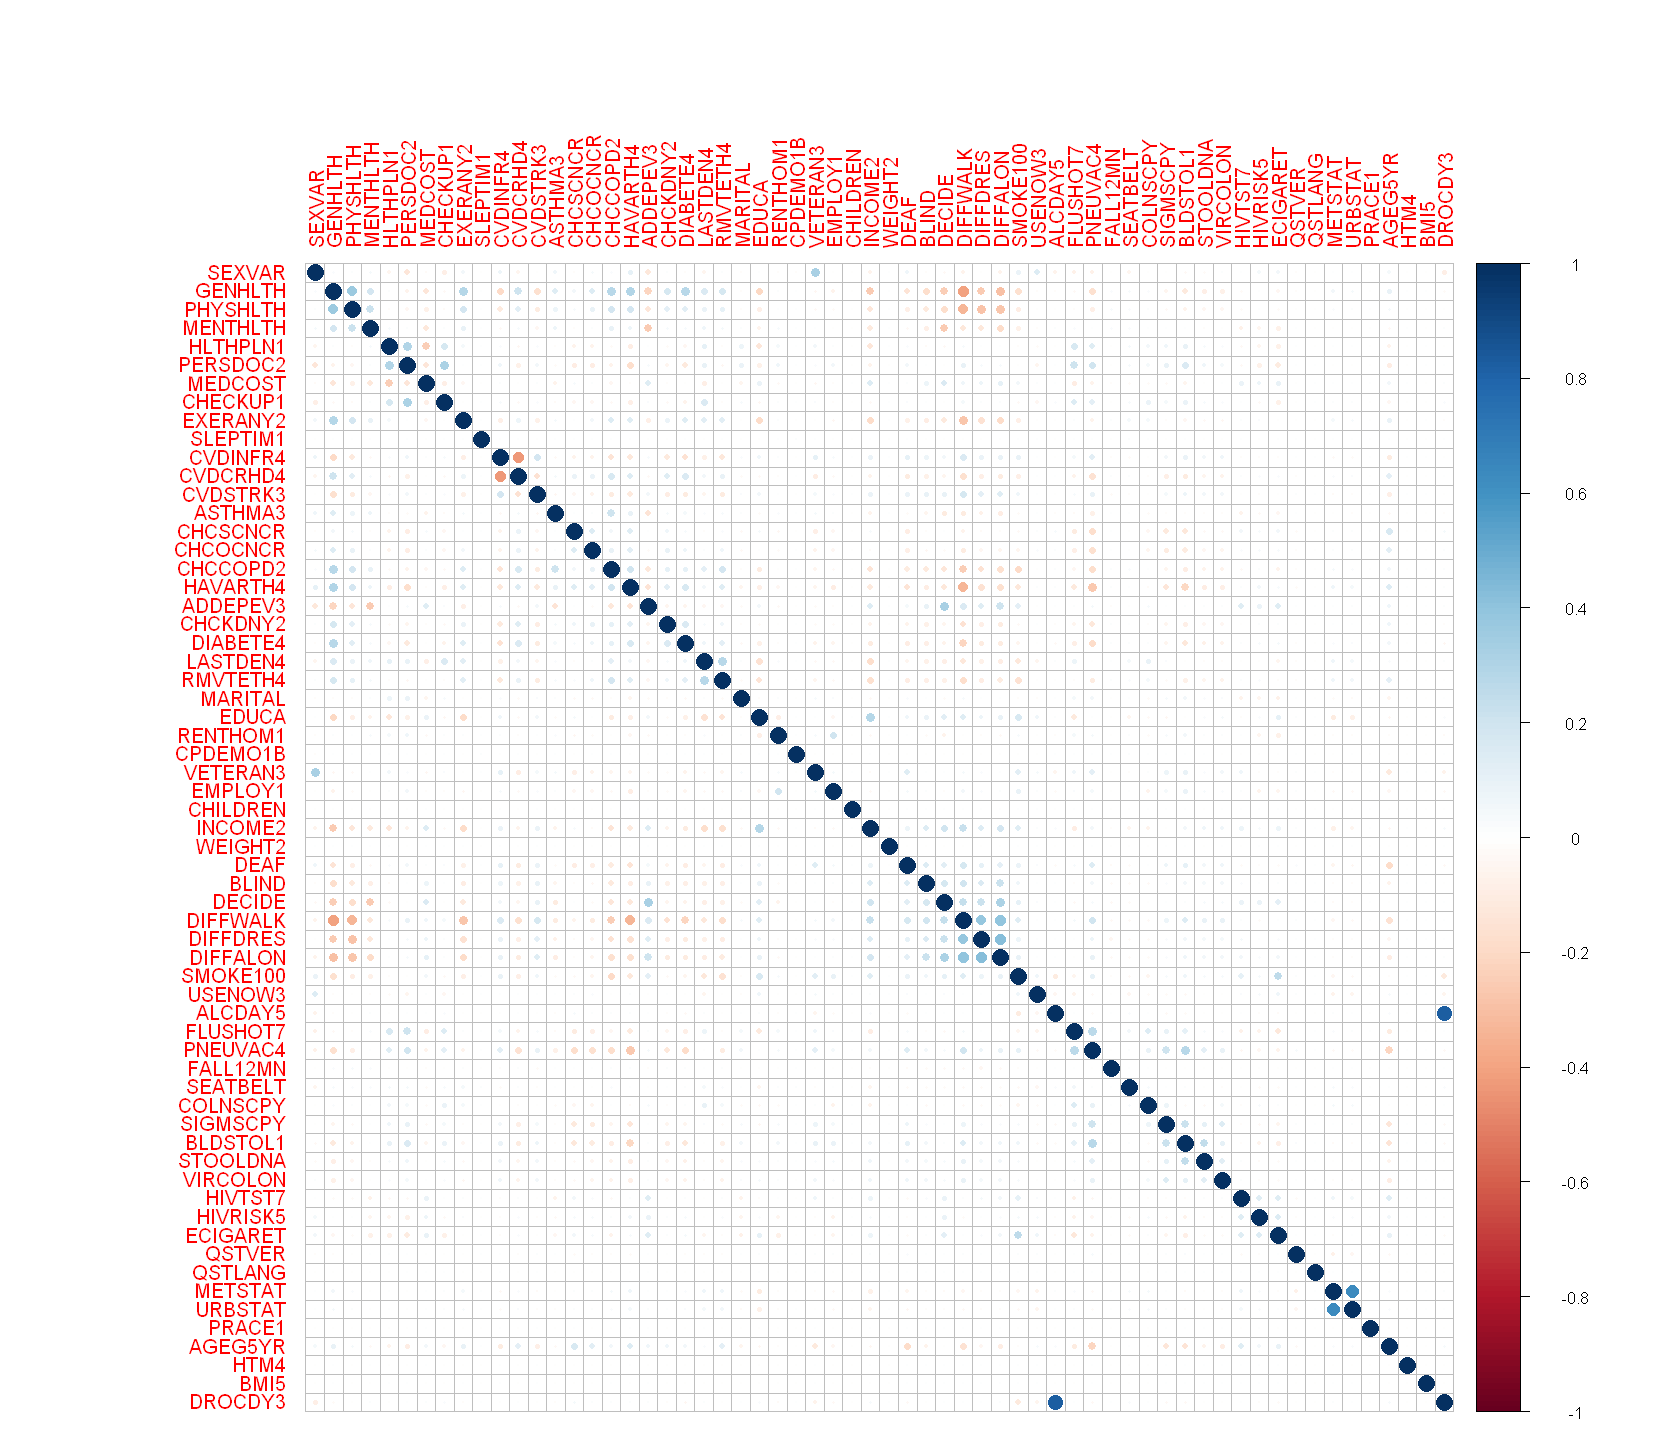

In [36]:
# how to get correlation
ourdata[] <- lapply(ourdata,as.integer)
res <- cor(ourdata)
#            x          y
# x  1.0000000 -0.0369479
# y -0.0369479  1.0000000

# visualize it
library(corrplot)
corrplot(res)